<div style="color: red; padding: 10px; text-align: center; height: 70px;">
    <div style="
        margin: auto;
        width: 50%;
        border-top-left-radius: 25px;
        background: url('https://www.jowhareh.com/images/Jowhareh/galleries_9/large_080c2ace-45ef-494f-ab42-5feaabb8b639.webp') no-repeat center center;
        border-bottom-right-radius: 25px;
        border-top-right-radius: 50px;
        border-bottom-left-radius: 50px;
        color: #ffffff;
        height: 100%;
        font-size: 28px;
        line-height: 70px;
        box-shadow: 0 0 5px rgb(0, 103, 15), 0 0 15px rgba(0, 255, 255, 0.5);
        font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
        text-shadow: 1px 1px 3px black;
    ">
        import library
    </div>
</div>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
import numpy as np
from IPython.display import display, HTML
import ipywidgets as widgets
from ipywidgets import interactive
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

<div style="color: red; padding: 10px; text-align: center; height: 70px;">
    <div style="
        margin: auto;
        width: 50%;
        border-top-left-radius: 25px;
        background: url('https://www.jowhareh.com/images/Jowhareh/galleries_9/large_080c2ace-45ef-494f-ab42-5feaabb8b639.webp') no-repeat center center;
        border-bottom-right-radius: 25px;
        border-top-right-radius: 50px;
        border-bottom-left-radius: 50px;
        color: #ffffff;
        height: 100%;
        font-size: 28px;
        line-height: 70px;
        box-shadow: 0 0 5px rgb(0, 103, 15), 0 0 15px rgba(0, 255, 255, 0.5);
        font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
        text-shadow: 1px 1px 3px black;
    ">
        Import Dataset
    </div>
</div>


In [2]:
df_train=pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")
df_test=pd.read_csv("/kaggle/input/mobile-price-classification/test.csv")
display(df_train.head().style.background_gradient(cmap='cividis'))

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.200000,0,1,0,7,0.600000,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.500000,1,0,1,53,0.700000,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.500000,1,2,1,41,0.900000,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.500000,0,0,0,10,0.800000,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.200000,0,13,1,44,0.600000,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


<div style="
    background: linear-gradient(145deg, #0d0d0d, #1a1a1a);
    border-left: 12px solid rgb(0, 255, 204);
    width: 50%;
    margin: 40px auto;
    padding: 24px 32px;
    border-radius: 20px;
    box-shadow: 0 0 25px rgba(0, 255, 204, 0.3), inset 0 0 20px rgba(0, 255, 204, 0.1);
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    position: relative;
    overflow: hidden;
    text-align: center;
">
  <div style="
      position: absolute;
      top: -22px;
      right: -20px;
      background: linear-gradient(135deg, #00ffcc, #0066ff);
      color: white;
      font-size: 26px;
      padding: 10px 16px;
      border-radius: 50%;
      box-shadow: 0 0 15px rgba(0, 255, 204, 0.8);
      font-weight: bold;
  "></div>
  <p style="color:rgb(0, 255, 204); font-size: 21px; margin: 0; font-weight: bold; letter-spacing: 2px;">
    EDA
  </p>
</div>


In [3]:
df=df_train.copy()

In [4]:
unique_values = df.columns

html_code = """
<div style='
    background-color: black;
    border-radius: 15px;
    padding: 20px;
    box-shadow: 0 0 15px rgba(0,0,0,0.1);
    width: 90%;
    margin: auto;
    display: grid;
    grid-template-columns: repeat(auto-fill, minmax(120px, 1fr));
    gap: 10px;
    font-family: sans-serif;
'>
"""

for value in unique_values:
    html_code += f"""
    <div style='
        background: linear-gradient(135deg, #200122, #6f0000);
        color: white;
        padding: 20px;
        border-radius: 10px;
        font-size: 14px;
        box-shadow: 0 4px 8px rgba(0,0,0,0.2);
        text-align: center;
        display: flex;
        align-items: center;
        justify-content: center;
        height: 80px;
    '>
        {value}
    </div>
    """

html_code += "</div>"

from IPython.display import display, HTML
display(HTML(html_code))


<div style="color: red; padding: 10px; text-align: center; height: 70px;">
    <div style="
        margin: auto;
        width: 50%;
        border-top-left-radius: 25px;
        background: url('https://www.jowhareh.com/images/Jowhareh/galleries_9/large_080c2ace-45ef-494f-ab42-5feaabb8b639.webp') no-repeat center center;
        border-bottom-right-radius: 25px;
        border-top-right-radius: 50px;
        border-bottom-left-radius: 50px;
        color: #ffffff;
        height: 100%;
        font-size: 28px;
        line-height: 70px;
        box-shadow: 0 0 5px rgb(0, 103, 15), 0 0 15px rgba(0, 255, 255, 0.5);
        font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
        text-shadow: 1px 1px 3px black;
    ">
        Dataset Summary
    </div>
</div>


In [5]:
from IPython.display import HTML
import pandas as pd

varin=[]
unoque=[]
count=[]
dtype=[]
missing=[]

for x in df.columns:
    varin.append(x)
    unoque.append(len(df[x].unique()))
    count.append(len(df[x]))
    dtype.append(df[x].dtype)
    missing.append(df[x].isna().sum())

missing_percent = [
    round((m / c) * 100, 2) if c > 0 else 0 
    for m, c in zip(missing, count)
]

output = pd.DataFrame({
    "Variable": varin,
    "Unique Values": unoque,
    "Count": count,
    "Data Type": dtype,
    "Missing": missing,
    "Missing (%)": missing_percent
})


styles = """
<style>
table {
    border-collapse: collapse;
    width: 100%;
    font-family: Arial, sans-serif;
    font-size: 14px;
}
th {
    background-color: #4CAF50;
    color: white;
    padding: 8px;
    text-align: left;
}
td {
    border: 1px solid #ddd;
    padding: 8px;
}
tr:nth-child(even) {
    background-color: #f2f2f2;
}
tr:hover {
    background-color: cyan;
    color:black;
}
</style>
"""


html_table = output.to_html(index=False, escape=False)
HTML(styles + html_table)


Variable,Unique Values,Count,Data Type,Missing,Missing (%)
battery_power,1094,2000,int64,0,0.0
blue,2,2000,int64,0,0.0
clock_speed,26,2000,float64,0,0.0
dual_sim,2,2000,int64,0,0.0
fc,20,2000,int64,0,0.0
four_g,2,2000,int64,0,0.0
int_memory,63,2000,int64,0,0.0
m_dep,10,2000,float64,0,0.0
mobile_wt,121,2000,int64,0,0.0
n_cores,8,2000,int64,0,0.0


In [6]:
Continuous=['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
Discrete=['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi', 'price_range']

columns_html = f"""
<div style="
    display: flex;
    gap: 20px;
    justify-content: center;
    align-items: flex-start;
    flex-wrap: wrap;
    margin-top: 30px;
    font-family: 'Segoe UI', sans-serif;
">

    <div style="
        background: linear-gradient(145deg, #141e30, #243b55); 
        color: white; 
        padding: 25px 30px; 
        border-radius: 20px; 
        min-width: 250px;
        box-shadow: 0 0px 10px green; 
        text-align: center;
    ">
        <h3 style="margin-top: 0; font-size: 24px;color:white">📊 Continuous Features</h3>
        <ul style="list-style: none; padding: 0; font-size: 18px; text-align: left; line-height: 1.8;">
            {''.join(f'<li> <strong>{h}</strong></li>' for h in Continuous)}
        </ul>
    </div>

    <div style="
        background: linear-gradient(145deg, #141e30, #243b55); 
        color: white; 
        padding: 25px 30px; 
        border-radius: 20px; 
        min-width: 250px;
        box-shadow: 0 0px 10px cyan; 
        text-align: center;
    ">
        <h3 style="margin-top: 0; font-size: 24px;color:white">🔢 Discrete Features</h3>
        <ul style="list-style: none; padding: 0; font-size: 18px; text-align: left; line-height: 1.8;">
            {''.join(f'<li> <strong>{x}</strong></li>' for x in Discrete)}
        </ul>
    </div>

</div>
"""


display(HTML(columns_html))


In [7]:
 

Continuous=pd.DataFrame(data=df,columns=Continuous)
describe = Continuous.describe().T
describe.style.background_gradient(cmap='Greens')

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.000000,1238.518500,439.418206,501.000000,851.750000,1226.000000,1615.250000,1998.000000
clock_speed,2000.000000,1.522250,0.816004,0.500000,0.700000,1.500000,2.200000,3.000000
fc,2000.000000,4.309500,4.341444,0.000000,1.000000,3.000000,7.000000,19.000000
int_memory,2000.000000,32.046500,18.145715,2.000000,16.000000,32.000000,48.000000,64.000000
m_dep,2000.000000,0.501750,0.288416,0.100000,0.200000,0.500000,0.800000,1.000000
mobile_wt,2000.000000,140.249000,35.399655,80.000000,109.000000,141.000000,170.000000,200.000000
pc,2000.000000,9.916500,6.064315,0.000000,5.000000,10.000000,15.000000,20.000000
px_height,2000.000000,645.108000,443.780811,0.000000,282.750000,564.000000,947.250000,1960.000000
px_width,2000.000000,1251.515500,432.199447,500.000000,874.750000,1247.000000,1633.000000,1998.000000
ram,2000.000000,2124.213000,1084.732044,256.000000,1207.500000,2146.500000,3064.500000,3998.000000



  <div style="color: red; padding: 10px; text-align: center; height: 70px;">
    <div style="
        margin: auto;
        width: 50%;
        border-top-left-radius: 25px;
        background: url('https://www.jowhareh.com/images/Jowhareh/galleries_9/large_080c2ace-45ef-494f-ab42-5feaabb8b639.webp') no-repeat center center;
        border-bottom-right-radius: 25px;
        border-top-right-radius: 50px;
        border-bottom-left-radius: 50px;
        color: #ffffff;
        height: 100%;
        font-size: 28px;
        line-height: 70px;
        box-shadow: 0 0 5px rgb(0, 103, 15), 0 0 15px rgba(0, 255, 255, 0.5);
        font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
        text-shadow: 1px 1px 3px black;
    ">
         Checking for noise and outliers
    </div>
</div>


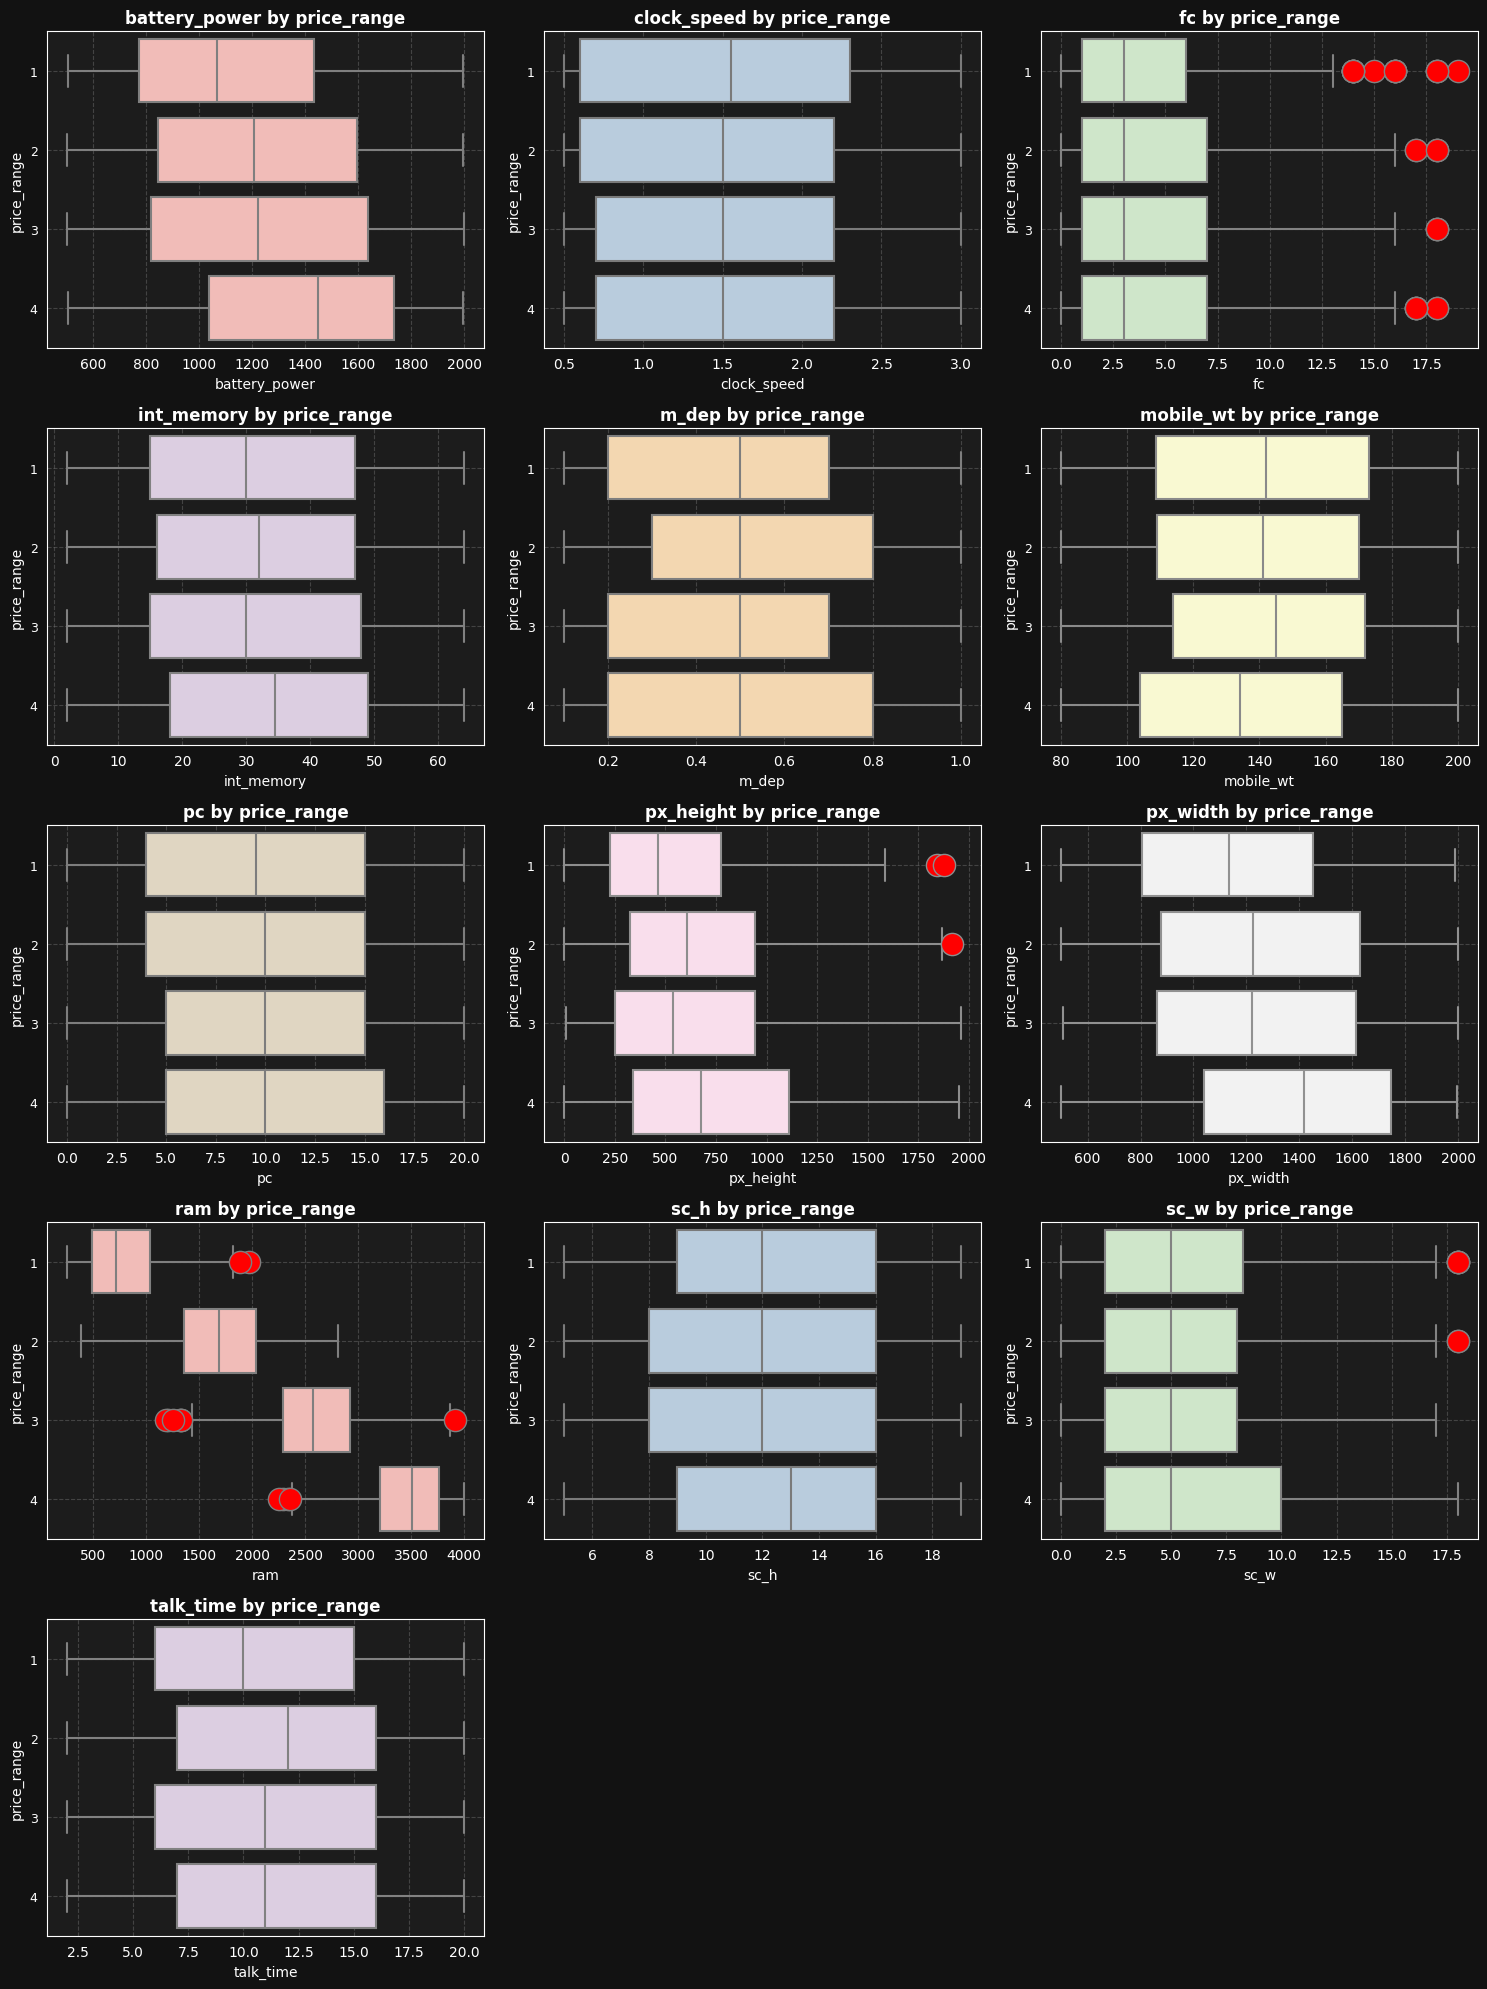

In [8]:


selected_features=['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
colors = sns.color_palette("Pastel1", len(selected_features))

n_cols = 3
n_rows = (len(selected_features) + n_cols - 1) // n_cols

sns.set_style("darkgrid", {"axes.facecolor": "#1c1c1c"})

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()
fig.patch.set_color("black")
for ax in axes:
    ax.set_facecolor("gray")
for i, feature in enumerate(selected_features):
    ax = axes[i]
    

    ax.set_facecolor('#1c1c1c')

    sns.boxplot(
    data=df,
    x=feature,
    y='price_range',
    orient='h',
    color=colors[i],
    ax=ax,
    flierprops=dict(marker='o', markerfacecolor='red', markersize=16, linestyle='none')  
)

    

    ax.set_title(f'{feature} by price_range', fontsize=12, fontweight='bold', color='white')
    ax.set_xlabel(feature, fontsize=10, color='white')
    ax.set_ylabel("price_range", fontsize=10, color='white')

    ax.set_yticks([0, 1,2,3])
    ax.set_yticklabels(['1', '2','3','4'], fontsize=9, color='white')

    ax.tick_params(colors='white')
    ax.grid(True, linestyle='--', alpha=0.4, color='gray')


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


fig.patch.set_facecolor('#121212')

plt.tight_layout()
plt.show()


<div style="background:#ffffff; border:1px solid #e2e8f0; border-radius:20px; padding:28px; max-width:90%; box-shadow:0 8px 24px rgba(0,0,0,0.08); font-family:'Segoe UI', Tahoma, sans-serif;">

  <h3 style="margin:0 0 16px; font-size:18px; font-weight:700; color:#2563eb; border-left:4px solid #2563eb; padding-left:10px;">
    Data Cleaning Note
  </h3>
  
  <p style="line-height:1.7; font-size:15px; margin:12px 0; color:#334155;">
    <span style="font-weight:600; color:#0f172a;">Column:</span> Screen Width (in cm)
  </p>
  
  <p style="line-height:1.7; font-size:15px; margin:12px 0; color:#334155;">
    I noticed that this column contained values starting from 0, which is not logical. About <span style="color:#dc2626; font-weight:600;">9%</span> of the data had a value of 0.
  </p>
  
  <p style="line-height:1.7; font-size:15px; margin:12px 0; color:#334155;">
    I treated these cases as missing values and decided to impute them.
  </p>
  
  <p style="line-height:1.7; font-size:15px; margin:12px 0; color:#334155;">
    After testing several models, the <span style="font-weight:600; color:#0f172a;">Random Forest Regressor</span> gave the best results, so I used it to fill in the missing values.
  </p>
</div>


In [9]:
df[df["sc_w"]==0].shape

(180, 21)

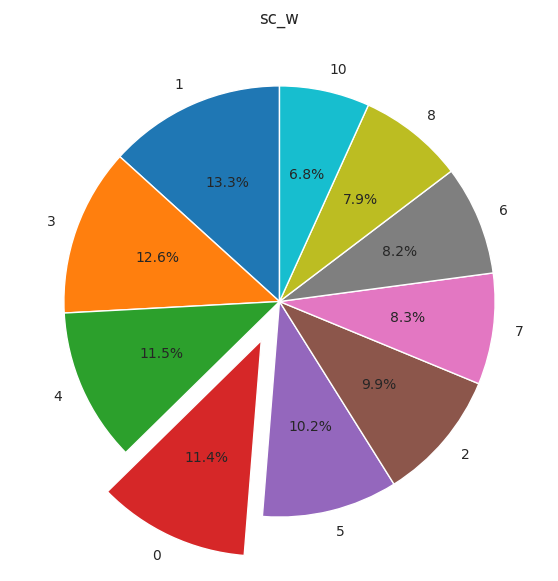

In [10]:
x = df["sc_w"].value_counts()[:10]

plt.figure(figsize=(7,7))
plt.pie(
    x.values, 
    labels=x.index, 
    autopct="%1.1f%%", 
    startangle=90,
    explode=[0, 0, 0, 0.2, 0, 0, 0, 0,0,0] 
)
plt.title("sc_w")
plt.show()


In [11]:
from IPython.display import display, Markdown
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from IPython.display import display, HTML





sc_w = df.copy()
cols_to_multiply = df.columns.drop('ram')
sc_w = sc_w.join(
    df[cols_to_multiply].multiply(df['ram'], axis=0)
      .rename(columns=lambda x: f'ram*{x}')
)

X_features = sc_w.drop("sc_w", axis=1)
y_target = sc_w["sc_w"]


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_features)
X_scaled = pd.DataFrame(X_scaled, columns=X_features.columns)


x_train, x_test, y_train, y_test = train_test_split(
    X_scaled, y_target, test_size=0.2, random_state=0
)


models = {
    "LinearRegression": LinearRegression(fit_intercept=True, n_jobs=-1),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "SVR_RBF": SVR(kernel='rbf', C=100, epsilon=0.01, gamma=0.1),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=0),
}


results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    })


results_df = pd.DataFrame(results).sort_values(by="R²", ascending=False)


box_md = """
<h2 style='color:#00e5ff; font-family:Segoe UI, sans-serif; text-align:center; margin-bottom:20px;'>
📊 Regression Metrics Comparison
</h2>
"""

for _, row in results_df.iterrows():
    box_md += f"""
    <div style="
        background: linear-gradient(135deg, #0f2027, #203a43, #2c5364);
        border-radius: 18px;
        padding: 18px 22px;
        margin-bottom: 15px;
        color: #f1f1f1;
        box-shadow: 0 8px 25px rgba(0, 0, 0, 0.35);
        font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
        transition: transform 0.3s ease;
    ">
        <h3 style="margin:0 0 12px 0; color:#ffcc00; font-weight:600;">
            {row['Model']}
        </h3>
        
        <div style="display:flex; justify-content:space-between; margin:4px 0;">
            <span>📉 MAE</span>
            <span style="color:#00e676; font-weight:bold;">{row['MAE']:.4f}</span>
        </div>
        <div style="display:flex; justify-content:space-between; margin:4px 0;">
            <span>📉 MSE</span>
            <span style="color:#29b6f6; font-weight:bold;">{row['MSE']:.4f}</span>
        </div>
        <div style="display:flex; justify-content:space-between; margin:4px 0;">
            <span>📉 RMSE</span>
            <span style="color:#ff7043; font-weight:bold;">{row['RMSE']:.4f}</span>
        </div>
        <div style="display:flex; justify-content:space-between; margin:4px 0;">
            <span>⭐ R²</span>
            <span style="color:#ffd600; font-weight:bold;">{row['R²']:.4f}</span>
        </div>
    </div>
    """


best_model = results_df.iloc[0]["Model"]
box_md = """
<h2 style='color:#00bcd4; font-family:Segoe UI, sans-serif; text-align:center; margin-bottom:15px; font-size:22px;'>
📊 Regression Metrics Comparison
</h2>
"""

for _, row in results_df.iterrows():
   box_md = """
<h2 style='color:#00bcd4; font-family:Segoe UI, sans-serif; text-align:center; margin-bottom:15px; font-size:22px;'>
📊 Regression Metrics Comparison
</h2>

<div style="display:flex; flex-wrap:wrap; gap:12px; justify-content:center;">
"""

def progress_bar(value, color):

    percent = min(max(value, 0), 1) * 100  
    return f"""
    <div style="background:#333; border-radius:8px; height:8px; width:100%; margin-top:3px;">
        <div style="background:{color}; width:{percent}%; height:100%; border-radius:8px;"></div>
    </div>
    """

for _, row in results_df.iterrows():
    max_mae = results_df["MAE"].max()
    max_mse = results_df["MSE"].max()
    max_rmse = results_df["RMSE"].max()
    
    mae_score = 1 - (row["MAE"]/max_mae) if max_mae != 0 else 1
    mse_score = 1 - (row["MSE"]/max_mse) if max_mse != 0 else 1
    rmse_score = 1 - (row["RMSE"]/max_rmse) if max_rmse != 0 else 1
    r2_score = row["R²"] if row["R²"] <= 1 else 1
    
    box_md += f"""
    <div style="
        background:#1e1e2f;
        border-radius:12px;
        padding:12px;
        flex:1 1 calc(25% - 12px);
        min-width:200px;
        color:#f1f1f1;
        font-family:'Segoe UI', Tahoma, sans-serif;
        font-size:13px;
        box-shadow:0 4px 12px rgba(0,0,0,0.25);
    ">
        <h3 style="margin:0 0 8px 0; color:#4dd0e1; font-size:15px; text-align:center;">
            {row['Model']}
        </h3>
        
        <div>
            <span>📉 MAE: {row['MAE']:.4f}</span>
            {progress_bar(mae_score, "#00e676")}
        </div>
        <div>
            <span>📉 MSE: {row['MSE']:.4f}</span>
            {progress_bar(mse_score, "#29b6f6")}
        </div>
        <div>
            <span>📉 RMSE: {row['RMSE']:.4f}</span>
            {progress_bar(rmse_score, "#ff7043")}
        </div>
        <div>
            <span>⭐ R²: {row['R²']:.4f}</span>
            {progress_bar(r2_score, "#ffd600")}
        </div>
    </div>
    """

box_md += "</div>"


best_model = results_df.iloc[0]["Model"]
box_md += f"""
<div style="
    background: red;
    border-radius: 14px;
    padding: 14px;
    margin-top:20px;
    color: #fff;
    font-weight:600;
    text-align:center;
    font-size:15px;
    box-shadow: 0 4px 15px rgba(0,188,212,0.5);
">
    ✅ Best Model: {best_model}
</div>
"""

display(HTML(box_md))





In [12]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

target = "sc_w"
df = df.copy()

cols_to_multiply = [c for c in df.columns if c not in ("ram", target)]
interactions = (
    df[cols_to_multiply]
    .multiply(df["ram"], axis=0)
    .rename(columns=lambda c: f"ram*{c}")
)

learn = pd.concat([df, interactions], axis=1)

X = learn.drop(columns=[target])
y = learn[target]

mask_zero = df[target] == 0
mask_train = ~mask_zero

scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X.loc[mask_train]),
    columns=X.columns, index=X.index[mask_train]
)
X_pred_scaled = pd.DataFrame(
    scaler.transform(X.loc[mask_zero]),
    columns=X.columns, index=X.index[mask_zero]
)

rf = RandomForestRegressor(n_estimators=200, random_state=0)
rf.fit(X_train_scaled, y.loc[mask_train])

imputed_values = rf.predict(X_pred_scaled)
df.loc[mask_zero, target] = imputed_values


/tmp/ipykernel_13/1056558810.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 9.045  6.235  3.48   7.05   2.76   2.53   3.955  5.99   7.48   2.27
  5.66   3.715  9.62   9.185  7.925  4.74   6.995  4.595  6.545  2.365
  5.885  4.815  4.115  8.375  5.735  6.245  6.19   2.865  7.085  6.975
  8.21   7.115  7.865  2.47   3.375  2.14   2.915  4.31   6.285  2.57
  4.35   9.495  4.5    6.965  7.44   6.735  2.53   4.39   2.19   2.105
  3.225  5.935  3.33   2.545  6.89   8.79   2.09   2.255  8.12   4.11
  4.     4.15   6.64   3.17   7.635  7.98   7.195  3.53  10.465  2.835
  8.955  3.44  10.095  6.365  4.54   2.7    2.25   2.115  2.56   2.875
  5.245  7.555  4.62   6.885  3.87   3.535  8.23   5.585  3.6    2.7
  2.31   3.345  4.875  3.495  7.24   9.78   4.42   4.15   3.455  4.26
  4.845  6.495  7.495  2.895  5.025  6.63   4.545  3.37   7.34   7.275
  2.385  9.72   6.155  7.035  3.93   5.055  9.815  5.205  2.

<div style="background:#ffffff; border:1px solid #e2e8f0; border-radius:20px; padding:28px; max-width:640px; box-shadow:0 8px 24px rgba(0,0,0,0.08); font-family:'Segoe UI', Tahoma, sans-serif; margin-top:20px;">

  <h3 style="margin:0 0 16px; font-size:18px; font-weight:700; color:#2563eb; border-left:4px solid #2563eb; padding-left:10px;">
    Data Cleaning Note
  </h3>
  
  <p style="line-height:1.7; font-size:15px; margin:12px 0; color:#334155;">
    <span style="font-weight:600; color:#0f172a;">Column:</span> px_height
  </p>
  
  <p style="line-height:1.7; font-size:15px; margin:12px 0; color:#334155;">
    I noticed that this column contained values of 0. After checking, I found that there are only <span style="color:#dc2626; font-weight:600;">2</span> such cases.
  </p>
  
  <p style="line-height:1.7; font-size:15px; margin:12px 0; color:#334155;">
    I decided to remove these rows entirely.
  </p>
</div>


In [13]:
df=df[df["px_height"]!=0]

<Axes: ylabel='px_height'>

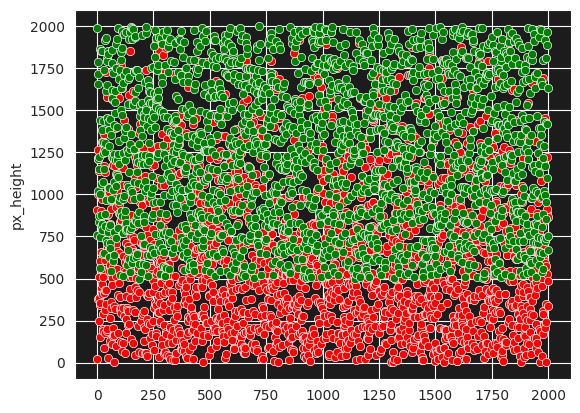

In [14]:
sns.scatterplot(df["px_height"],color="red")
sns.scatterplot(df["px_width"],color="green")

<div style="background:#ffffff; border:1px solid #e2e8f0; border-radius:20px; padding:28px; max-width:640px; box-shadow:0 8px 24px rgba(0,0,0,0.08); font-family:'Segoe UI', Tahoma, sans-serif; margin-top:20px;">

  <h3 style="margin:0 0 16px; font-size:18px; font-weight:700; color:#2563eb; border-left:4px solid #2563eb; padding-left:10px;">
    Data Cleaning Note
  </h3>
  
  <p style="line-height:1.7; font-size:15px; margin:12px 0; color:#334155;">
    <span style="font-weight:600; color:#0f172a;">Column:</span> pc
  </p>
  
  <p style="line-height:1.7; font-size:15px; margin:12px 0; color:#334155;">
    I noticed that this column contains <span style="color:#dc2626; font-weight:600;">101</span> entries with a value of 0, which means these phones do not have a rear camera.
  </p>
  
  <p style="line-height:1.7; font-size:15px; margin:12px 0; color:#334155;">
    Upon further inspection, I found that these 101 phones also lack a front camera, indicating that they are older models, similar to classic Nokia phones.
  </p>
</div>


In [15]:
df[df["pc"]==0].shape


(101, 21)

In [16]:
x=df[df["pc"]==0]
x["fc"].value_counts()

fc
0    101
Name: count, dtype: int64

In [17]:
Discrete=['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi', 'price_range']
Continuous=['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']


<div style="color: red; padding: 10px; text-align: center; height: 70px;">
    <div style="
        margin: auto;
        width: 50%;
        border-top-left-radius: 25px;
        border-bottom-right-radius: 25px;
        border-top-right-radius: 50px;
        border-bottom-left-radius: 50px;
        color: #ffffff;
        height: 100%;
        font-size: 28px;
        line-height: 70px;
        box-shadow: 0 0 12px rgb(103, 0, 96), 0 0 15px rgba(195, 0, 255, 0.5);
        font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
        text-shadow: 1px 1px 3px black;
    ">
Continuous 
    </div>
</div>



<div style="
    background: linear-gradient(135deg,rgb(231, 73, 73),rgb(95, 0, 16));
    border-radius: 15px;
    padding: 20px 30px;
    color: white;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    font-size: 1.4em;
    font-weight: 700;
    text-align: center;
    box-shadow: 0 8px 15px rgba(160, 25, 25, 0.4);
    letter-spacing: 1.2px;
    user-select: none;
    max-width: 300px;
    margin: 25px auto;
    ">
    <em>Drawing a diagram</em>
</div>


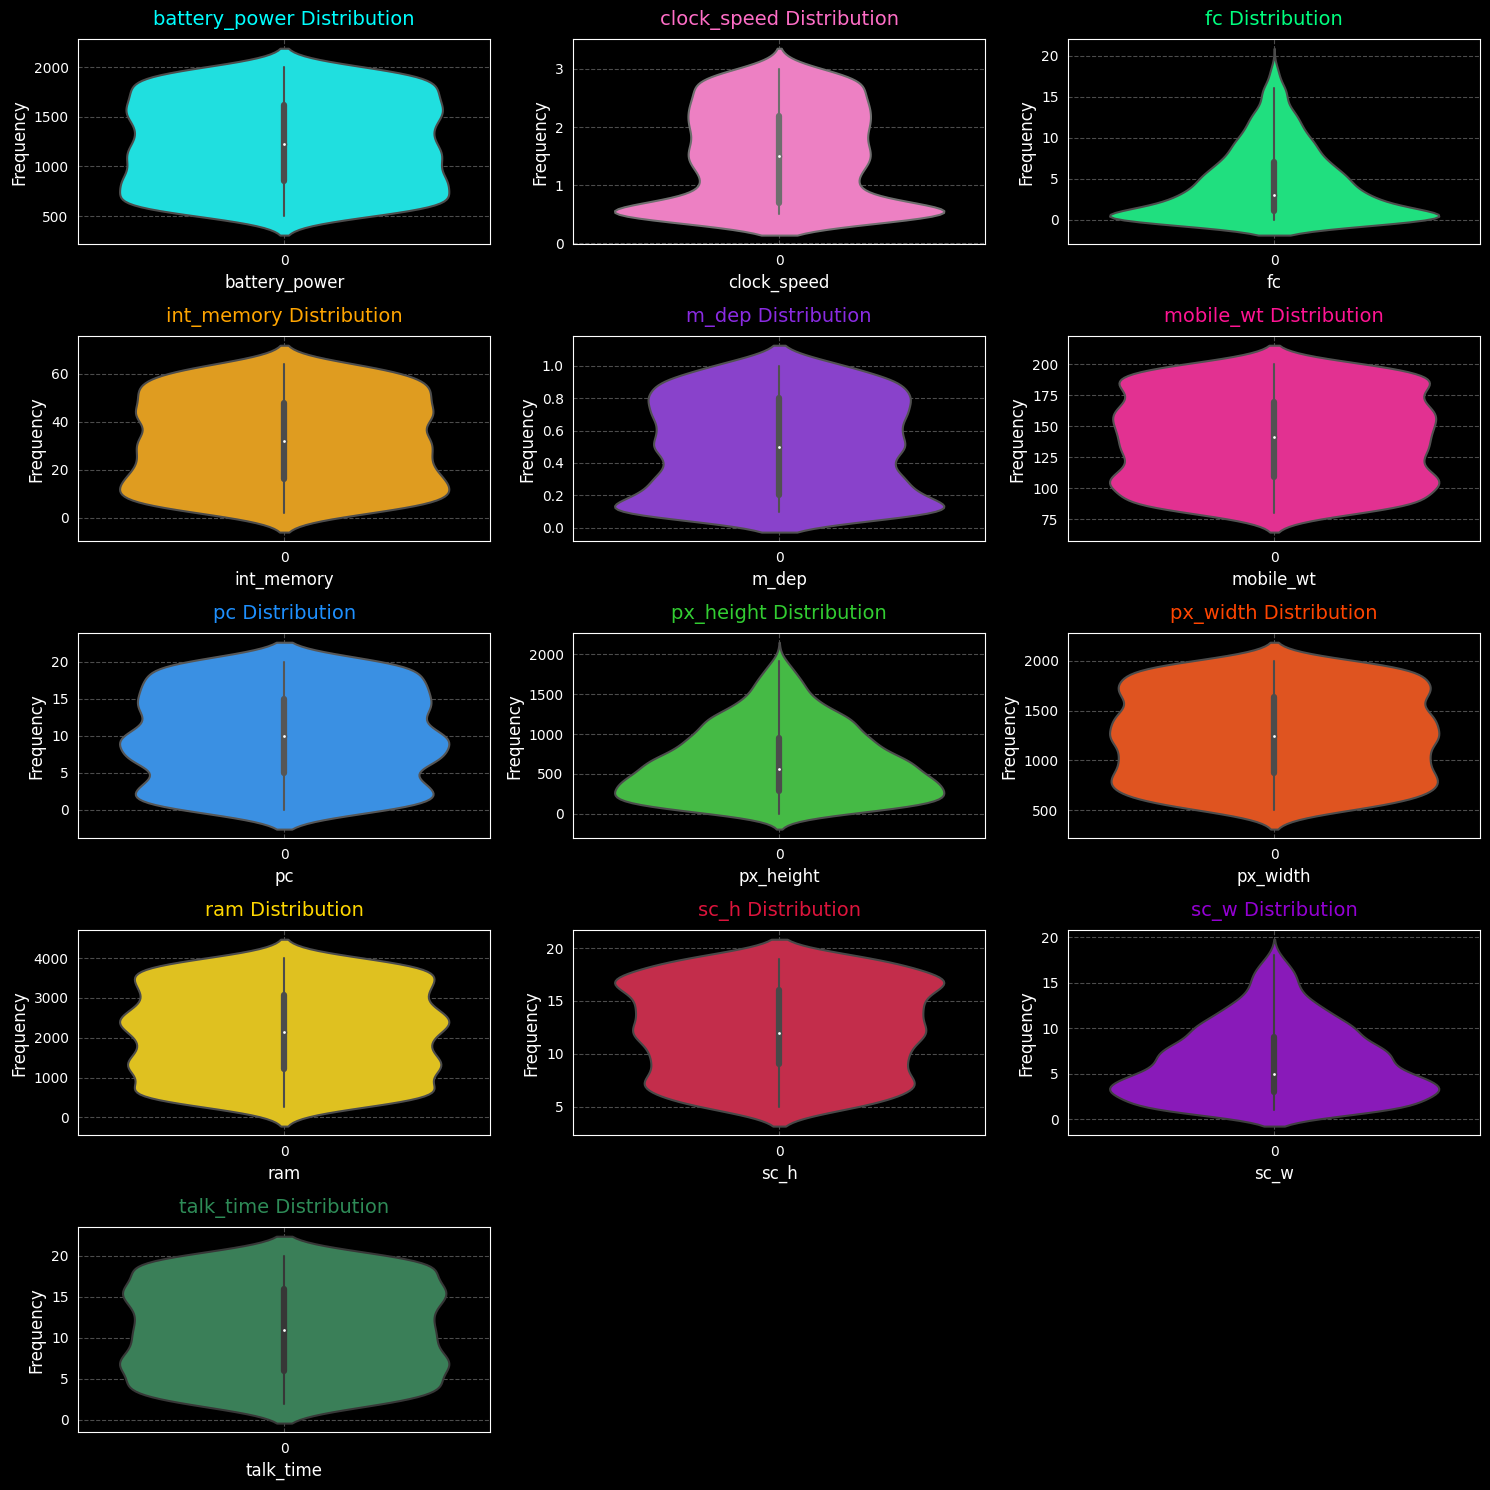

In [18]:



Continuous = [
    'battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 
    'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 
    'sc_h', 'sc_w', 'talk_time'
]

colors = [
    "#00ffff",  
    "#ff6ec7", 
    "#00ff7f",  
    "#ffa500", 
    "#8a2be2",  
    "#ff1493",  
    "#1e90ff", 
    "#32cd32", 
    "#ff4500", 
    "#ffd700",  
    "#dc143c",
    "#9400d3",  
    "#2e8b57",  #
]


n = len(Continuous)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
fig.patch.set_facecolor("black")
axes = axes.flatten()

for i, col in enumerate(Continuous):
    ax = axes[i]
    ax.set_facecolor("black")

    sns.violinplot(df[col], color=colors[i % len(colors)], edgecolor='white', ax=ax)

    ax.set_title(f"{col} Distribution", fontsize=14, color=colors[i % len(colors)], pad=10)
    ax.set_xlabel(col, fontsize=12, color="white")
    ax.set_ylabel("Frequency", fontsize=12, color="white")
    ax.tick_params(axis='x', colors='white', labelsize=10)
    ax.tick_params(axis='y', colors='white', labelsize=10)
    ax.grid(True, linestyle='--', alpha=0.3)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



<div style="
    background: linear-gradient(135deg, #667eea, #764ba2);
    border-radius: 15px;
    padding: 20px 30px;
    color: white;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    font-size: 1.4em;
    font-weight: 700;
    text-align: center;
    box-shadow: 0 8px 15px rgba(118, 75, 162, 0.4);
    letter-spacing: 1.2px;
    user-select: none;
    max-width: 300px;
    margin: 25px auto;
    ">
    <em>Statistical Review</em>
</div>


In [19]:

continuous = [
    'battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 
    'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 
    'sc_h', 'sc_w', 'talk_time'
]

def build_section(col_name, value_counts):
    html = f"""
    <div style="background-color:#101826; color:#f0f0f0; padding: 16px; border-radius: 16px; 
                box-shadow: 0 0 12px rgba(0, 255, 255, 0.15); font-family: 'Segoe UI', sans-serif;
                min-width: 250px; flex: 1 1 calc(33% - 20px);">
        <h3 style="color:#00eaff; font-size: 17px; margin-bottom: 15px; text-align: center;
                   border-bottom: 1px solid #00eaff; padding-bottom: 6px;">
            🔷 {col_name} Value Counts
        </h3>
        <div style="display: flex; flex-wrap: wrap; gap: 12px; justify-content: center;">
    """
    for val, count in value_counts.head(50).items(): 
        html += f"""
        <div style="position: relative; display: flex; flex-direction: column; align-items: center;">
            <div style='
                background-color: yellow;
                color: black;
                padding: 3px 7px;
                border-radius: 999px;
                font-size: 9px;
                position: absolute;
                top: -8px;
                z-index: 2;
                box-shadow: 0 0 3px rgba(255,255,255,0.3);
            '>{count}</div>
            <div style='
                background-color:#00b894;
                color:white;
                padding: 8px 12px;
                border-radius:999px;
                font-size: 11px;
                min-width: 30px;
                text-align: center;
                box-shadow: 0 0 5px rgba(0,0,0,0.2);
            '>{val}</div>
        </div>
        """
    html += "</div></div>"
    return html


all_sections_html = "<div style='display: flex; flex-wrap: wrap; gap: 20px; justify-content: center;'>"

for col in continuous:
    counts = df[col].value_counts().sort_values(ascending=False)

    all_sections_html += build_section(col, counts)

all_sections_html += "</div>"


display(HTML(all_sections_html))


In [20]:

from scipy import stats

Continuous = [
    'battery_power', 'clock_speed', 'fc', 'int_memory',
    'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width',
    'ram', 'sc_h', 'sc_w', 'talk_time'
]


for col in Continuous:
    df[col] = pd.to_numeric(df[col], errors='coerce')

numeric_cols = [col for col in Continuous if pd.api.types.is_numeric_dtype(df[col]) and df[col].notna().any()]


def descriptive_stats(series):
    if series.dropna().empty:
        return {k: np.nan for k in [
            'Mean','Median','Mode','Std','Variance','Range',
            'Q1','Q3','IQR','Skewness','Kurtosis','Min','Max',
            'Sum','Count','Coeff_of_Var_%','90th_Percentile'
        ]}
    return {
        'Mean': series.mean(),
        'Median': series.median(),
        'Mode': series.mode()[0] if not series.mode().empty else np.nan,
        'Std': series.std(),
        'Variance': series.var(),
        'Range': series.max() - series.min(),
        'Q1': series.quantile(0.25),
        'Q3': series.quantile(0.75),
        'IQR': series.quantile(0.75) - series.quantile(0.25),
        'Skewness': stats.skew(series.dropna()),
        'Kurtosis': stats.kurtosis(series.dropna()),
        'Min': series.min(),
        'Max': series.max(),
        'Sum': series.sum(),
        'Count': series.count(),
        'Coeff_of_Var_%': (series.std() / series.mean() * 100) if series.mean() != 0 else np.nan,
        '90th_Percentile': series.quantile(0.9)
    }


stats_dict = {col: descriptive_stats(df[col]) for col in numeric_cols}

stats_dfs = {}
for col, stats_d in stats_dict.items():
    df_stats = pd.DataFrame(stats_d.items(), columns=['Metric', 'Value'])
    df_stats['Value'] = df_stats['Value'].apply(lambda x: f"{x:.2f}" if pd.notnull(x) else "")
    stats_dfs[col] = df_stats


def make_three_column_table(stats_dfs):
    cols = list(stats_dfs.keys())
    while len(cols) % 3 != 0:
        cols.append(None)
    rows = len(cols) // 3
    
    html = """
    <style>
        .stats-table-container {
            width: 100%;
            border-collapse: collapse;
            font-family: 'Segoe UI', Arial, sans-serif;
        }
        .stats-card {
            color:black;
            vertical-align: top;
            border: 1px solid #ddd;
            border-radius: 12px;
            padding: 12px;
            width: 33%;
            background: linear-gradient(145deg, #1a1a1a, #262626);
            box-shadow: 0 4px 12px rgba(0,0,0,0.4);
        }
        .stats-card h3 {
            text-align: center;
            color: cyan;
            font-size: 16px;
            margin-bottom: 10px;
            letter-spacing: 1px;
        }
        .stats-card table {
            width: 100%;
            border-collapse: collapse;
            font-size: 13px;
            color: black;
        }
        .stats-card th {
            background-color: #111;
            color: cyan;
            padding: 6px;
            border-bottom: 1px solid #333;
            text-align: center;
        }
        .stats-card td {
            padding: 6px;
            text-align: center;
            border-bottom: 1px solid #333;
        }
        .stats-card tr:hover {
            background-color: rgba(0,255,255,0.08);
        }
    </style>
    <table class="stats-table-container">
    """
    
    for r in range(rows):
        html += '<tr>'
        for c in range(3):
            idx = r*3 + c
            col_name = cols[idx]
            if col_name:
                raw_html = stats_dfs[col_name].to_html(index=False, border=0)
                raw_html = raw_html.replace(
                    '<table border="0" class="dataframe">',
                    '<table>'
                )
                html += f'<td class="stats-card">'
                html += f'<h3>{col_name}</h3>'
                html += raw_html
                html += '</td>'
            else:
                html += '<td></td>'
        html += '</tr>'
    html += '</table>'
    return html

display(HTML(make_three_column_table(stats_dfs)))


Metric,Value
Mean,1238.39
Median,1226.00
Mode,618.00
Std,439.37
Variance,193045.75
Range,1497.00
Q1,851.25
Q3,1615.00
IQR,763.75
Skewness,0.03



<div style="color: red; padding: 10px; text-align: center; height: 70px;">
    <div style="
        margin: auto;
        width: 50%;
        border-top-left-radius: 25px;
        border-bottom-right-radius: 25px;
        border-top-right-radius: 50px;
        border-bottom-left-radius: 50px;
        color: #ffffff;
        height: 100%;
        font-size: 28px;
        line-height: 70px;
        box-shadow: 0 0 12px rgb(103, 0, 0), 0 0 15px rgba(255, 0, 0, 0.5);
        font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
        text-shadow: 1px 1px 3px black;
    ">
   discrete
    </div>
</div>



<div style="
    background: linear-gradient(135deg,rgb(231, 73, 73),rgb(95, 0, 16));
    border-radius: 15px;
    padding: 20px 30px;
    color: white;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    font-size: 1.4em;
    font-weight: 700;
    text-align: center;
    box-shadow: 0 8px 15px rgba(160, 25, 25, 0.4);
    letter-spacing: 1.2px;
    user-select: none;
    max-width: 300px;
    margin: 25px auto;
    ">
    <em>Drawing a diagram</em>
</div>


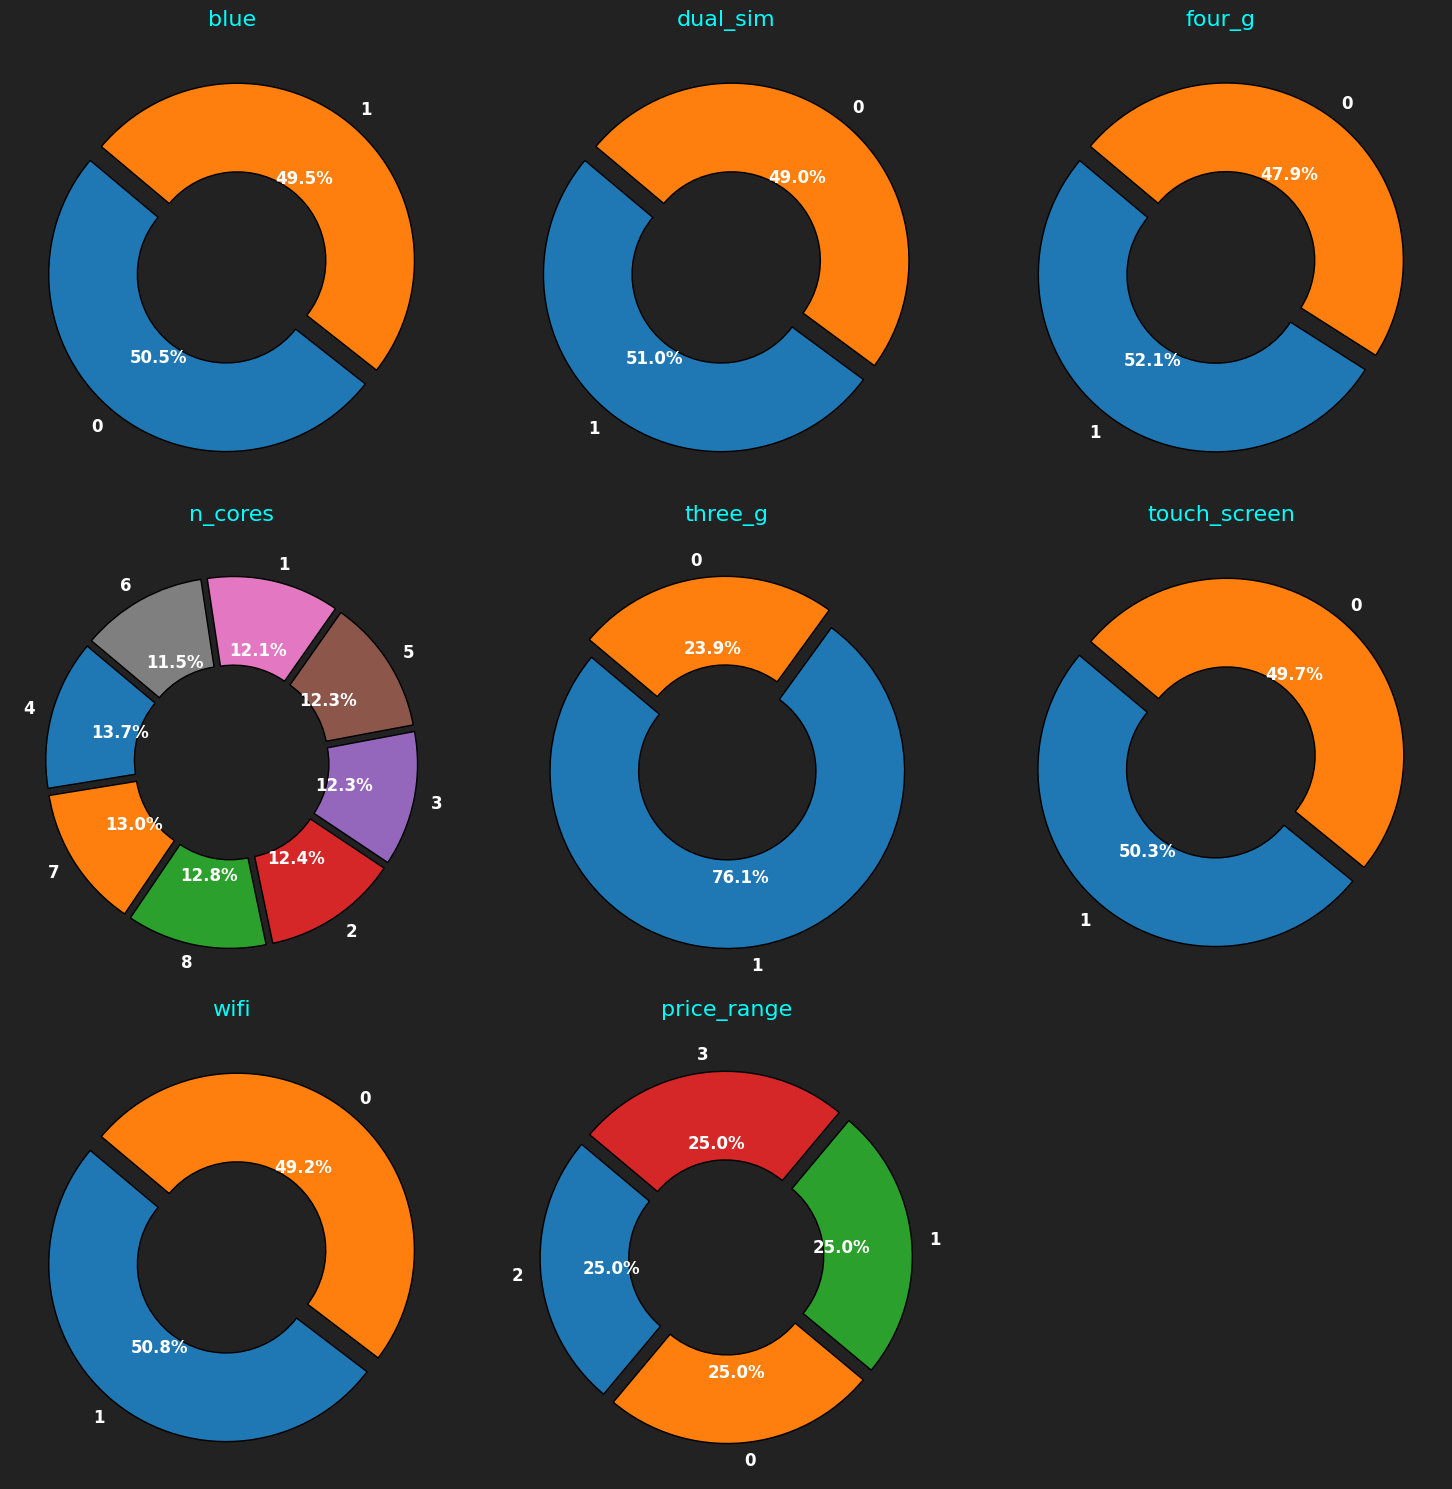

In [21]:


rows = (len(Discrete) + 2) // 3
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows), facecolor="#222222")
axes = axes.flatten()

colors = plt.cm.tab20.colors

for i, x in enumerate(Discrete):
    ax = axes[i]
    ax.set_facecolor('#222222')

    hh = df[x].value_counts()

    if x == "Family":
     
        explode = [0.12 if j in [0, 1] else 0 for j in range(len(hh))]
    else:
   
        explode = [0.05 for _ in range(len(hh))]

    wedges, texts, autotexts = ax.pie(
        hh.values,
        labels=hh.index,
        autopct='%1.1f%%',
        startangle=140,
        explode=explode,
        textprops={'color': 'white', 'fontsize': 12, 'weight': 'bold'},
        wedgeprops=dict(width=0.5, edgecolor='black')  # donut + مرز مشکی
    )

    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(12)
        autotext.set_weight('bold')

    ax.set_title(x, color='cyan', fontsize=16, pad=15)


for j in range(len(Discrete), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


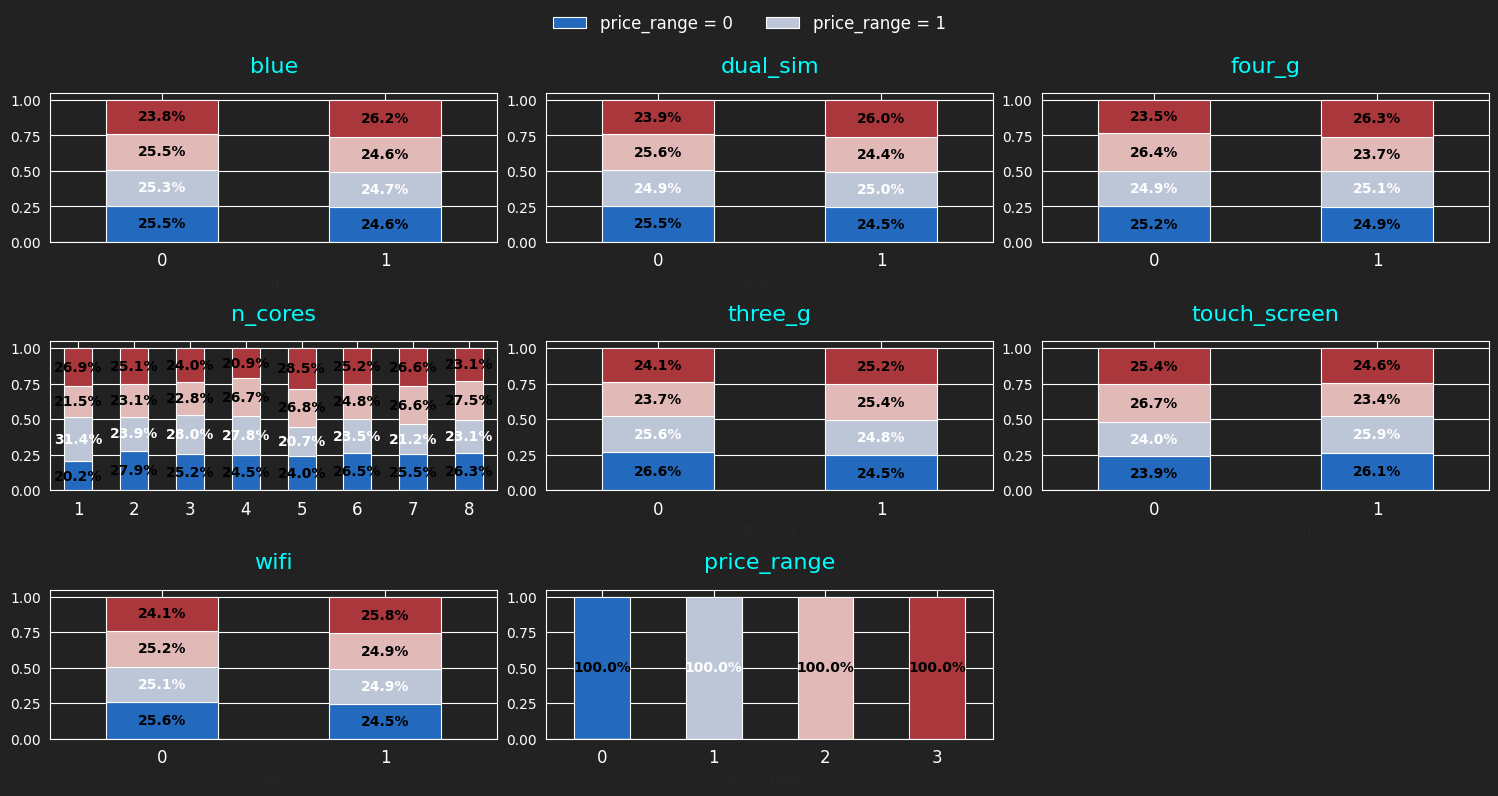

In [22]:


Discrete=['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi', 'price_range']

n = len(Discrete)
cols = 3
rows = (n + cols - 1) // cols 

fig, axes = plt.subplots(rows, cols, figsize=(15, 8), facecolor="#222222")
axes = axes.flatten()

for idx, x in enumerate(Discrete):
    cp_target = pd.crosstab(df[x], df['price_range'], normalize='index')

    ax = cp_target.plot(
        kind='bar',
        stacked=True,
        colormap='vlag',
        ax=axes[idx], 
        legend=False,
        edgecolor='white',
        linewidth=0.8
    )
    
    ax.set_facecolor('#222222')
    ax.set_title(x, color='cyan', fontsize=16, pad=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=12, color='white')
    ax.tick_params(axis='y', colors='white')

    for i, total in enumerate(cp_target.index):
        bottom = 0
        for j, value in enumerate(cp_target.columns):
            percentage = cp_target.loc[total, value]
            if percentage > 0.05: 
                text_color = 'white' if j == 1 else 'black'
                ax.text(
                    i,
                    bottom + percentage / 2,
                    f'{percentage * 100:.1f}%',
                    ha='center', va='center', fontsize=10, color=text_color, fontweight='bold'
                )
            bottom += percentage

for i in range(len(Discrete), len(axes)):
    fig.delaxes(axes[i])

fig.legend(['price_range = 0', 'price_range = 1'], loc='upper center', ncol=2, frameon=False, fontsize=12, labelcolor='white')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


<div style="
    background: linear-gradient(135deg, #667eea, #764ba2);
    border-radius: 15px;
    padding: 20px 30px;
    color: white;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    font-size: 1.4em;
    font-weight: 700;
    text-align: center;
    box-shadow: 0 8px 15px rgba(118, 75, 162, 0.4);
    letter-spacing: 1.2px;
    user-select: none;
    max-width: 300px;
    margin: 25px auto;
    ">
    <em>Statistical Review</em>
</div>


In [23]:

Discrete=['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi', 'price_range']

def build_section(col_name, value_counts):
    html = f"""
    <div style="background-color:#101826; color:#f0f0f0; padding: 16px; border-radius: 16px; 
                box-shadow: 0 0 12px rgba(0, 255, 255, 0.15); font-family: 'Segoe UI', sans-serif;
                min-width: 250px; flex: 1 1 calc(33% - 20px);">
        <h3 style="color:#00eaff; font-size: 17px; margin-bottom: 15px; text-align: center;
                   border-bottom: 1px solid #00eaff; padding-bottom: 6px;">
            🔷 {col_name} Value Counts
        </h3>
        <div style="display: flex; flex-wrap: wrap; gap: 12px; justify-content: center;">
    """
    for val, count in value_counts.head(50).items(): 
        html += f"""
        <div style="position: relative; display: flex; flex-direction: column; align-items: center;">
            <div style='
                background-color: yellow;
                color: black;
                padding: 3px 7px;
                border-radius: 999px;
                font-size: 9px;
                position: absolute;
                top: -8px;
                z-index: 2;
                box-shadow: 0 0 3px rgba(255,255,255,0.3);
            '>{count}</div>
            <div style='
                background-color:#00b894;
                color:white;
                padding: 8px 12px;
                border-radius:999px;
                font-size: 11px;
                min-width: 30px;
                text-align: center;
                box-shadow: 0 0 5px rgba(0,0,0,0.2);
            '>{val}</div>
        </div>
        """
    html += "</div></div>"
    return html


all_sections_html = "<div style='display: flex; flex-wrap: wrap; gap: 20px; justify-content: center;'>"

for col in Discrete:
    counts = df[col].value_counts().sort_values(ascending=False)

    all_sections_html += build_section(col, counts)

all_sections_html += "</div>"


display(HTML(all_sections_html))


In [24]:
import pandas as pd
from IPython.display import display, HTML
import re

Discrete=['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi', 'price_range']

desc_dict = {}
for col in Discrete:
    desc = df[col].describe()
   
    desc_df = desc.reset_index()
    desc_df.columns = ['Statistic', col]
    desc_dict[col] = desc_df

def clean_html_index(html_table):

    return html_table

def make_three_column_table(desc_dict):
    cols = list(desc_dict.keys())
    while len(cols) % 3 != 0:
        cols.append(None)
    rows = len(cols) // 3
    
    html = '<table style="width:100%; border-collapse: collapse; font-family: Arial, sans-serif;">'
    for r in range(rows):
        html += '<tr>'
        for c in range(3):
            idx = r*3 + c
            col_name = cols[idx]
            if col_name:
                raw_html = desc_dict[col_name].to_html(index=False, border=1)

                raw_html = raw_html.replace('<table border="1" class="dataframe">',
                    '<table style="border:1px solid #ddd; text-align:center; width:100%; border-collapse: collapse;">')
                raw_html = raw_html.replace('<th>', '<th style="background-color:#4CAF50; color:white; padding:6px;">')
                raw_html = raw_html.replace('<td>', '<td style="padding:6px;">')

                html += f'<td style="vertical-align:top; border:1px solid #ddd; padding: 10px; width:33%;">'
                html += f'<h3 style="text-align:center; color:#4CAF50; margin-bottom:8px;">{col_name}</h3>'
                html += raw_html
                html += '</td>'
            else:
                html += '<td></td>'
        html += '</tr>'
    html += '</table>'
    return html

display(HTML(make_three_column_table(desc_dict)))


Statistic,blue
count,1998.000000
mean,0.494995
std,0.500100
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000
Statistic,dual_sim
count,1998.000000


In [25]:

from scipy import stats


Discrete=['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi', 'price_range']

for col in Discrete:
    df[col] = pd.to_numeric(df[col], errors='coerce')

numeric_cols = [col for col in Discrete if pd.api.types.is_numeric_dtype(df[col]) and df[col].notna().any()]

def descriptive_stats(series):
    if series.dropna().empty:
        return {k: np.nan for k in ['Mean','Median','Mode','Std','Variance','Range',
                                   'Q1','Q3','IQR','Skewness','Kurtosis','Min','Max',
                                   'Sum','Count','Coeff_of_Var_%','90th_Percentile']}
    return {
        'Mean': series.mean(),
        'Median': series.median(),
        'Mode': series.mode()[0] if not series.mode().empty else np.nan,
        'Std': series.std(),
        'Variance': series.var(),
        'Range': series.max() - series.min(),
        'IQR': series.quantile(0.75) - series.quantile(0.25),
        'Skewness': stats.skew(series.dropna()),
        'Kurtosis': stats.kurtosis(series.dropna()),
        'Min': series.min(),
        'Max': series.max(),
        'Sum': series.sum(),
        'Coeff_of_Var_%': (series.std() / series.mean() * 100) if series.mean() != 0 else np.nan,
        '90th_Percentile': series.quantile(0.9)
    }

stats_dict = {col: descriptive_stats(df[col]) for col in numeric_cols}

stats_dfs = {}
for col, stats_d in stats_dict.items():
    df_stats = pd.DataFrame(stats_d.items(), columns=['Metric', 'Value'])
    df_stats['Value'] = df_stats['Value'].apply(lambda x: f"{x:.2f}" if pd.notnull(x) else "")
    stats_dfs[col] = df_stats

def make_three_column_table(stats_dfs):
    cols = list(stats_dfs.keys())
    while len(cols) % 3 != 0:
        cols.append(None)
    rows = len(cols) // 3
    html = '<table style="width:100%; border-collapse: collapse; font-family: Arial, sans-serif;">'
    for r in range(rows):
        html += '<tr>'
        for c in range(3):
            idx = r*3 + c
            col_name = cols[idx]
            if col_name:
                raw_html = stats_dfs[col_name].to_html(index=False, border=1)
                raw_html = raw_html.replace(
                    '<table border="1" class="dataframe">',
                    '<table style="border:1px solid #ddd; width:100%; border-collapse: collapse; text-align: center; font-size:12px;">'
                )
                raw_html = raw_html.replace('<th>', '<th style="background-color:#1565c0; color:white; padding:5px; text-align:center; vertical-align:middle;">')

                raw_html = raw_html.replace('<td>', '<td style="padding:4px; text-align:center; vertical-align:middle;">')


                html += f'<td style="vertical-align:top; border:1px solid #ddd; padding:8px; width:33%;">'
                html += f'<h3 style="text-align:center; color:#1565c0; margin-bottom:8px; font-size:14px;">{col_name}</h3>'
                html += raw_html
                html += '</td>'
            else:
                html += '<td></td>'
        html += '</tr>'
    html += '</table>'
    return html

display(HTML(make_three_column_table(stats_dfs)))


Metric,Value
Mean,0.49
Median,0.00
Mode,0.00
Std,0.50
Variance,0.25
Range,1.00
IQR,1.00
Skewness,0.02
Kurtosis,-2.00
Min,0.00


# ______________________________________________________________________________________________________________________________________________


  <title>Mobile Feature Insights</title>
  <style>
    body {
      font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
      background: #f9fbfd;
      padding: 20px;
      margin: 0;
    }
    h1 {
      text-align: center;
      color: #2c3e50;
      margin-bottom: 30px;
    }
    .grid {
      display: grid;
      grid-template-columns: repeat(auto-fit, minmax(300px, 1fr));
      gap: 20px;
    }
    .card {
      background-color: #fff;
      border-left: 5px solid #3498db;
      padding: 20px;
      border-radius: 10px;
      box-shadow: 0 4px 10px rgba(0, 0, 0, 0.08);
      transition: 0.3s;
    }
    .card:hover {
      transform: translateY(-5px);
    }
    .card h2 {
      font-size: 18px;
      margin-top: 0;
      color: #2980b9;
    }
    .card p {
      margin: 8px 0;
      color: #333;
      line-height: 1.6;
    }
    .emoji {
      font-size: 18px;
      margin-right: 5px;
    }
    @media (max-width: 768px) {
      .grid {
        grid-template-columns: 1fr;
      }
    }
  </style>
</head>
<body>

  <h1>Mobile Feature Insights</h1>
  <div class="grid">
    <div class="card">
      <h2>🔵 Blue (Bluetooth)</h2>
      <p>50.5% of devices do <strong>not</strong> have Bluetooth (0)</p>
      <p>49.5% <strong>do</strong> have Bluetooth (1)</p>
      <p><strong>Insight:</strong> Bluetooth availability is almost evenly split — some phones are still launched without it.</p>
    </div>
    <div class="card">
      <h2>🔵 Dual SIM</h2>
      <p>51% support dual SIM</p>
      <p>49% are single SIM</p>
      <p><strong>Insight:</strong> Dual SIM is evenly distributed; it doesn't indicate price or category clearly.</p>
    </div>
    <div class="card">
      <h2>🔵 4G Support</h2>
      <p>52.1% support 4G</p>
      <p>47.9% do not</p>
      <p><strong>Insight:</strong> Slightly more than half the phones support 4G. Many still rely on older networks.</p>
    </div>
    <div class="card">
      <h2>🌈 Number of Cores</h2>
      <p>Evenly distributed from 1 to 8 cores</p>
      <p>Highest shares: 4, 7, and 8 cores (~13%)</p>
      <p><strong>Insight:</strong> Multi-core processors (especially 4-8 cores) are more common, possibly reflecting device performance levels.</p>
    </div>
    <div class="card">
      <h2>📶 3G Support</h2>
      <p>76.2% support 3G</p>
      <p>23.8% do not</p>
      <p><strong>Insight:</strong> 3G is a standard feature for most phones.</p>
    </div>
    <div class="card">
      <h2>🤳 Touch Screen</h2>
      <p>50.3% have touch screens</p>
      <p>49.7% do not</p>
      <p><strong>Insight:</strong> Surprisingly, about half of the devices lack touch screens — probably simple or feature phones.</p>
    </div>
    <div class="card">
      <h2>📡 Wi-Fi</h2>
      <p>50.7% have Wi-Fi</p>
      <p>49.3% do not</p>
      <p><strong>Insight:</strong> Wi-Fi is also evenly distributed; some devices are still without wireless connectivity.</p>
    </div>
    <div class="card">
      <h2>💸 Price Range</h2>
      <p>25% in each price category (0 to 3)</p>
      <p><strong>Insight:</strong> Price categories are balanced, which is ideal for training machine learning models (balanced classes).</p>
    </div>

  </div>


<div style="border: 2px solid #3498db; border-radius: 10px; padding: 20px; background-color: #f4faff; font-family: Segoe UI, sans-serif; line-height: 1.6; font-size: 15px; color: #2c3e50;">

  <h3 style="color: #2c3e50; margin-top: 0;">📊 Battery Analysis Summary</h3>

  <p>
    This analysis is based on a dataset of various mobile phones. The table above illustrates the 
    <strong style="color: #2980b9;">battery capacity range</strong> over different year ranges.
  </p>

  <p>
    Based on the available data, the majority of devices fall between the years 
    <strong style="color: #2980b9;">1999 to 2013</strong>, covering both 
    <strong style="color: #27ae60;">feature phones</strong> (e.g., old Nokia models) and 
    <strong style="color: #27ae60;">early smartphones</strong>.
  </p>

  <p>
    The <strong style="color: #c0392b;">battery capacity column shows high dispersion</strong>, 
    with approximately <strong>35% spread</strong>, indicating a wide range of values.
  </p>

  <p>
    Furthermore, <strong style="color: #c0392b;">90% of the phones have battery capacities below 1851 mAh</strong>, 
    suggesting that most entries in the dataset belong to older devices with lower power consumption.
  </p>

  <p>
    Additionally, while there is <strong style="color: #8e44ad;">no strong direct correlation between RAM and price</strong>, 
    we observed that <strong style="color: #8e44ad;">newer phones with higher RAM</strong> tend to have 
    <em style="color: #2c3e50;"><strong>wider price ranges</strong></em>, meaning that as RAM increases in newer models, the price variation becomes more significant.
  </p>

</div>


<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Mobile Feature Statistics</title>
  <style>
    body {
      font-family: Arial, sans-serif;
      background-color: #f4f4f4;
      padding: 20px;
    }
    .container {
      color:black;
      display: flex;
      flex-wrap: wrap;
      gap: 20px;
    }
    .card {
      background-color: #ffffff;
      border-left: 8px solid #2196f3;
      border-radius: 10px;
      padding: 20px;
      box-shadow: 0 2px 8px rgba(0, 0, 0, 0.1);
      flex: 1 1 400px;
    }
    .card:nth-child(2n) { border-left-color: #4caf50; }
    .card:nth-child(3n) { border-left-color: #ff9800; }
    .card:nth-child(4n) { border-left-color: #9c27b0; }
    .card h2 {
      font-size: 1.2rem;
      margin-bottom: 10px;
      color: #333;
    }
    .card p {
      margin: 4px 0;
      line-height: 1.6;
    }
  </style>
</head>
<body>
  <h1>Mobile Feature Statistics Summary</h1>
  <div class="container">
    <div class="card">
      <h2>Battery Power</h2>
      <p>Range: 501 to 1998 mAh</p>
      <p>Mean: 1238.52, Median: 1226.00, Mode: 618.00</p>
      <p>Standard deviation: 439.42 (moderate variability)</p>
      <p>Coefficient of Variation: 35.48%</p>
      <p>Skewness: 0.03, Kurtosis: -1.22</p>
      <p>90% of devices have battery capacity below 1851 mAh</p>
    </div>
    <div class="card">
      <h2>Clock Speed</h2>
      <p>Range: 0.50 to 3.00 GHz</p>
      <p>Mean: 1.52, Median: 1.50, Mode: 0.50</p>
      <p>Standard deviation: 0.82</p>
      <p>Coefficient of Variation: 53.61%</p>
      <p>Skewness: 0.18, Kurtosis: -1.32</p>
      <p>90% of devices have clock speed below 2.70 GHz</p>
    </div>
    <div class="card">
      <h2>Front Camera (fc)</h2>
      <p>Range: 0 to 19 MP</p>
      <p>Mean: 4.31, Median: 3.00, Mode: 0.00</p>
      <p>Standard deviation: 4.34</p>
      <p>Coefficient of Variation: 100.74%</p>
      <p>Skewness: 1.02, Kurtosis: 0.27</p>
      <p>90% of devices have front camera resolution below 11 MP</p>
    </div>
    <div class="card">
      <h2>Internal Memory</h2>
      <p>Range: 2 to 64 GB</p>
      <p>Mean: 32.05, Median: 32.00, Mode: 27.00</p>
      <p>Standard deviation: 18.15</p>
      <p>Coefficient of Variation: 56.62%</p>
      <p>Skewness: 0.06, Kurtosis: -1.22</p>
      <p>90% of devices have internal memory below 57 GB</p>
    </div>
    <div class="card">
      <h2>Mobile Depth</h2>
      <p>Range: 0.10 to 1.00 cm</p>
      <p>Mean: 0.50, Median: 0.50, Mode: 0.10</p>
      <p>Standard deviation: 0.29</p>
      <p>Coefficient of Variation: 57.48%</p>
      <p>Skewness: 0.09, Kurtosis: -1.27</p>
      <p>90% of devices have depth below 0.90 cm</p>
    </div>
    <div class="card">
      <h2>Mobile Weight</h2>
      <p>Range: 80 to 200 grams</p>
      <p>Mean: 140.25, Median: 141.00, Mode: 182.00</p>
      <p>Standard deviation: 35.40</p>
      <p>Coefficient of Variation: 25.24%</p>
      <p>Skewness: 0.01, Kurtosis: -1.21</p>
      <p>90% of devices weigh less than 189 grams</p>
    </div>
    <div class="card">
      <h2>Price Category</h2>
      <p>Range: 0 to 20</p>
      <p>Mean: 9.92, Median: 10.00, Mode: 10.00</p>
      <p>Standard deviation: 6.06</p>
      <p>Coefficient of Variation: 61.15%</p>
      <p>Skewness: 0.02, Kurtosis: -1.17</p>
      <p>90% of devices have price category below 18</p>
    </div>
    <div class="card">
      <h2>Pixel Height</h2>
      <p>Range: 0 to 1960 px</p>
      <p>Mean: 645.11, Median: 564.00, Mode: 347.00</p>
      <p>Standard deviation: 443.78</p>
      <p>Coefficient of Variation: 68.79%</p>
      <p>Skewness: 0.67, Kurtosis: -0.32</p>
      <p>90% of devices have pixel height below 1285</p>
    </div>
    <div class="card">
      <h2>Pixel Width</h2>
      <p>Range: 500 to 1998 px</p>
      <p>Mean: 1251.52, Median: 1247.00, Mode: 874.00</p>
      <p>Standard deviation: 432.20</p>
      <p>Coefficient of Variation: 34.53%</p>
      <p>Skewness: 0.01, Kurtosis: -1.19</p>
      <p>90% of devices have pixel width below 1854</p>
    </div>
    <div class="card">
      <h2>RAM</h2>
      <p>Range: 256 to 3998 MB</p>
      <p>Mean: 2124.21, Median: 2146.50, Mode: 1229.00</p>
      <p>Standard deviation: 1084.73</p>
      <p>Coefficient of Variation: 51.07%</p>
      <p>Skewness: 0.01, Kurtosis: -1.19</p>
      <p>90% of devices have RAM below 3637.70 MB</p>
    </div>
    <div class="card">
      <h2>Screen Height</h2>
      <p>Range: 5 to 19 cm</p>
      <p>Mean: 12.31, Median: 12.00, Mode: 17.00</p>
      <p>Standard deviation: 4.21</p>
      <p>Coefficient of Variation: 34.24%</p>
      <p>Skewness: -0.10, Kurtosis: -1.19</p>
      <p>90% of devices have screen height below 18 cm</p>
    </div>
    <div class="card">
      <h2>Screen Width</h2>
      <p>Range: 0 to 18 cm</p>
      <p>Mean: 5.77, Median: 5.00, Mode: 1.00</p>
      <p>Standard deviation: 4.36</p>
      <p>Coefficient of Variation: 75.54%</p>
      <p>Skewness: 0.63, Kurtosis: -0.39</p>
      <p>90% of devices have screen width below 12 cm</p>
    </div>
    <div class="card">
      <h2>Talk Time</h2>
      <p>Range: 2 to 20 hrs</p>
      <p>Mean: 11.01, Median: 11.00, Mode: 7.00</p>
      <p>Standard deviation: 5.46</p>
      <p>Coefficient of Variation: 49.62%</p>
      <p>Skewness: 0.01, Kurtosis: -1.22</p>
      <p>90% of devices have talk time below 19 hours</p>
    </div>
  </div>
</body>
</html>


<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <title>RAM Feature Analysis</title>
  <style>
    body {
      background-color: #1e1e2f;
      color: #f5f5f5;
      font-family: "Segoe UI", sans-serif;
      padding: 30px;
    }
    h1 {
      color: #00d8ff;
      text-align: center;
      margin-bottom: 40px;
    }
    table {
      width: 100%;
      border-collapse: collapse;
      background-color: #2e2e3e;
      box-shadow: 0 0 20px rgba(0,0,0,0.5);
    }
    th, td {
      padding: 14px;
      border: 1px solid #444;
      text-align: left;
    }
    th {
      background-color: #3e3e5e;
      color: #00ffab;
      font-size: 18px;
    }
    tr:nth-child(even) {
      background-color: #2b2b3a;
    }
    tr:hover {
      background-color: #3d3d56;
    }
    .strong { color: #90ee90; font-weight: bold; }
    .weak { color: #ffa07a; font-weight: bold; }
    .neutral { color: #f5f5f5; }
    .emoji { font-size: 18px; }
  </style>
</head>
<body>

  <h1>📊 Feature Analysis vs RAM & Price Range</h1>

  <table>
    <tr>
      <th>Feature</th>
      <th>Trend with RAM</th>
      <th>Price Behavior</th>
      <th>Insight</th>
    </tr>
    <tr>
      <td>🔋 <strong>battery_power</strong></td>
      <td class="strong">Strong positive correlation</td>
      <td class="strong">Higher prices have more RAM & battery</td>
      <td>Expensive phones need bigger batteries</td>
    </tr>
    <tr>
      <td>⚙️ clock_speed</td>
      <td class="weak">No clear trend</td>
      <td class="neutral">All price ranges scattered</td>
      <td>Clock speed isn’t tied to RAM or price</td>
    </tr>
    <tr>
      <td>🤳 fc (front camera)</td>
      <td class="neutral">Slight positive trend</td>
      <td class="neutral">Higher ranges dominate high fc</td>
      <td>Improves with RAM but not consistent</td>
    </tr>
    <tr>
      <td>💾 int_memory</td>
      <td class="strong">Clear positive correlation</td>
      <td class="strong">Higher prices = more memory</td>
      <td>RAM and storage grow together</td>
    </tr>
    <tr>
      <td>📏 m_dep</td>
      <td class="weak">No correlation</td>
      <td class="neutral">Evenly distributed</td>
      <td>Thickness is independent of price or RAM</td>
    </tr>
    <tr>
      <td>⚖️ mobile_wt</td>
      <td class="weak">No trend</td>
      <td class="neutral">All prices appear throughout</td>
      <td>Weight doesn’t determine phone tier</td>
    </tr>
    <tr>
      <td>📷 pc (primary camera)</td>
      <td class="strong">Moderate positive correlation</td>
      <td class="strong">Better camera in higher price ranges</td>
      <td>Good camera usually means better device</td>
    </tr>
    <tr>
      <td>↕️ px_height</td>
      <td class="strong">Strong positive correlation</td>
      <td class="strong">High px_height = high RAM & price</td>
      <td>High-res screens in premium phones</td>
    </tr>
    <tr>
      <td>↔️ px_width</td>
      <td class="strong">Strong positive correlation</td>
      <td class="strong">Same pattern as height</td>
      <td>Wider = better display = higher price</td>
    </tr>
    <tr>
      <td>📐 ram vs ram</td>
      <td class="strong">Perfect correlation</td>
      <td class="strong">Price splits clearly by RAM</td>
      <td>Confirms price rises with RAM</td>
    </tr>
    <tr>
      <td>📱 sc_h (screen height)</td>
      <td class="neutral">Weak trend</td>
      <td class="neutral">Slight increase with price</td>
      <td>Bigger screens mildly affect price</td>
    </tr>
    <tr>
      <td>📱 sc_w (screen width)</td>
      <td class="neutral">Weak trend</td>
      <td class="neutral">Slight increase with RAM</td>
      <td>Screen width matters less than height</td>
    </tr>
    <tr>
      <td>🕐 talk_time</td>
      <td class="weak">No correlation</td>
      <td class="neutral">All prices mixed</td>
      <td>Talk time not influenced by RAM</td>
    </tr>

  </table>

</body>
</html>

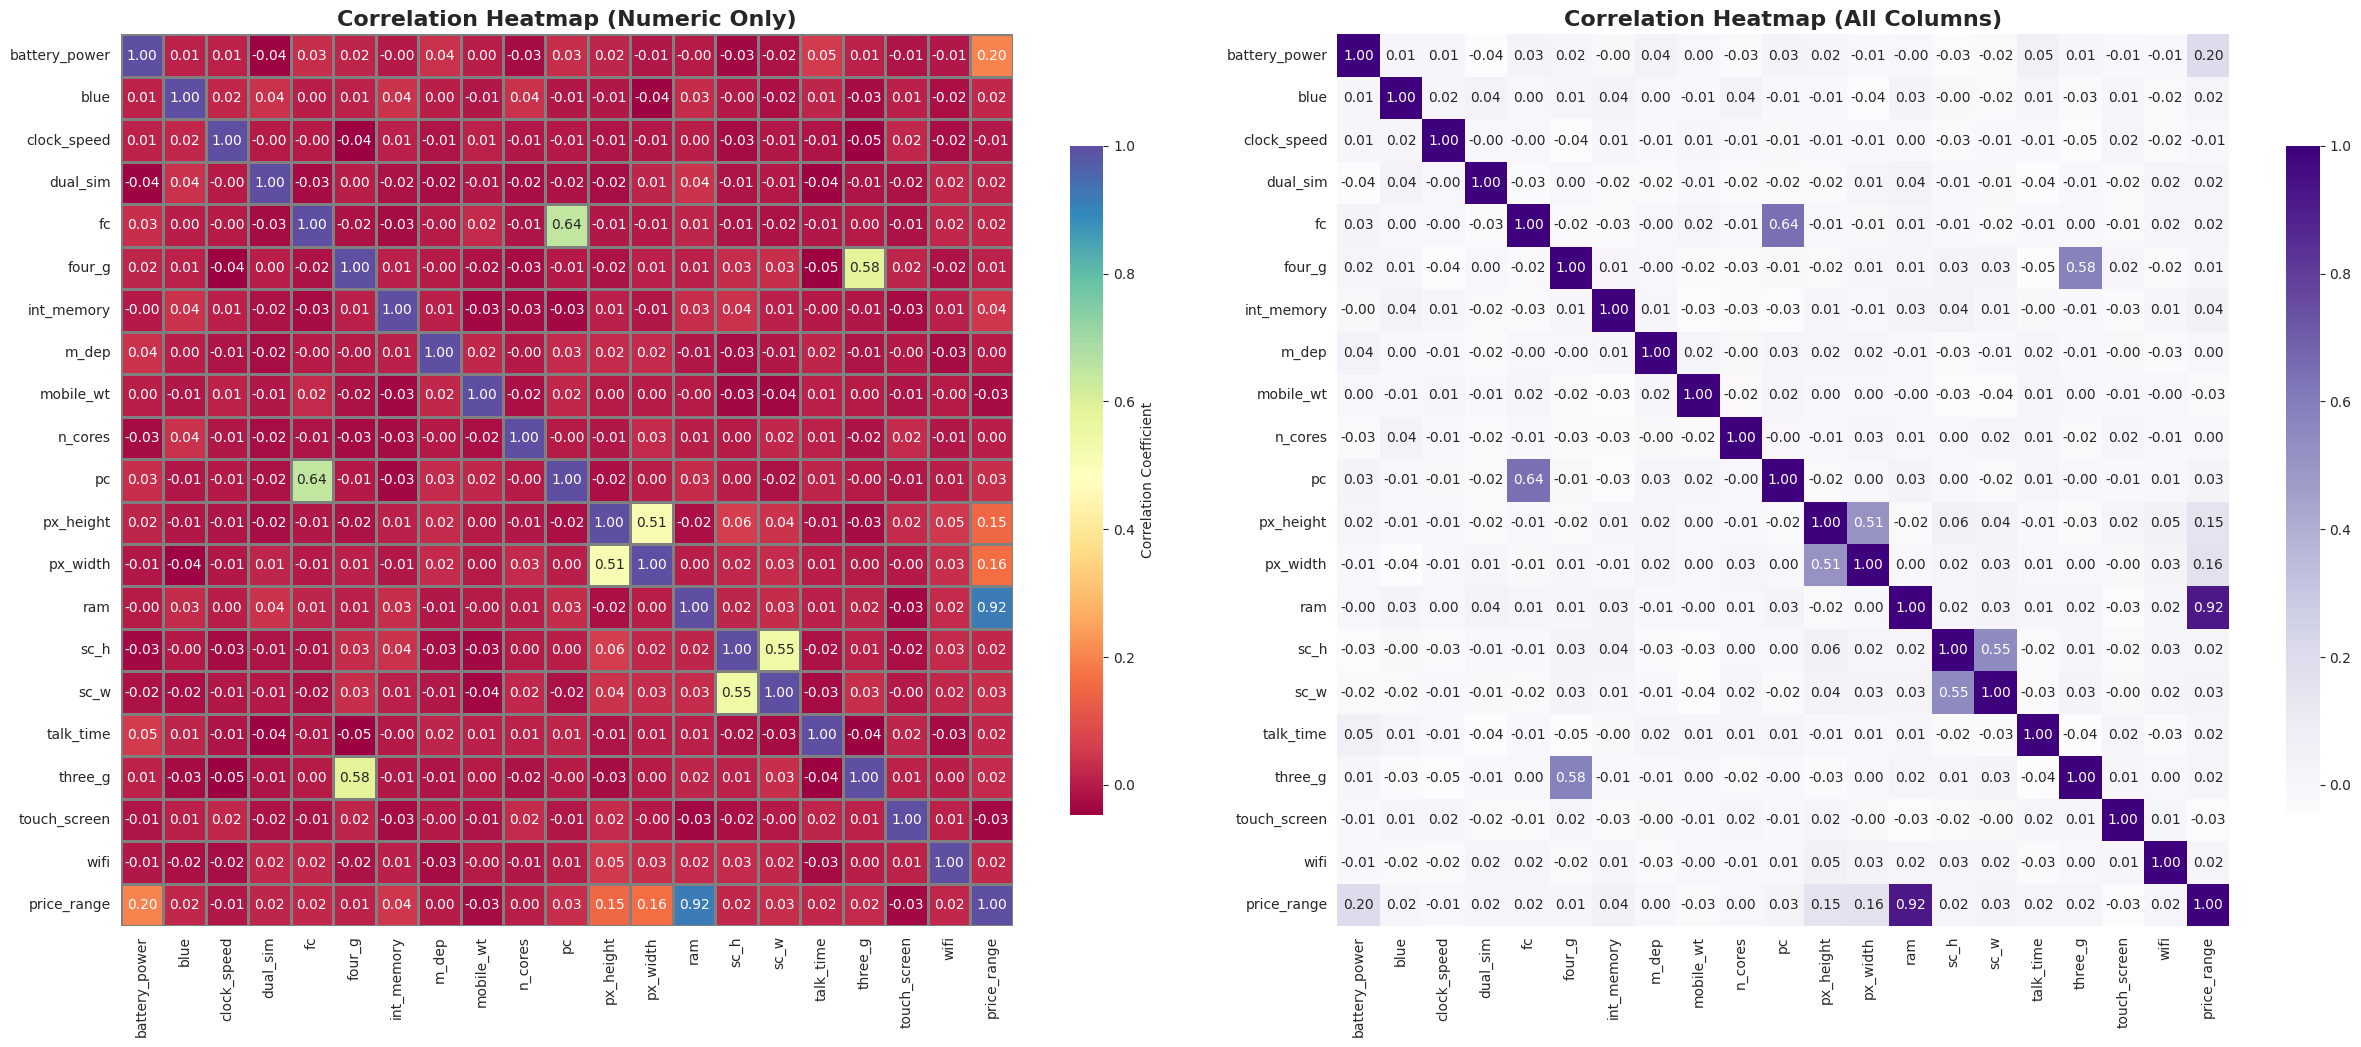

In [26]:

numeric_df = df.select_dtypes(include=["number"])
corr_matrix = numeric_df.corr()
corr_all = df.corr()


fig, axes = plt.subplots(1, 2, figsize=(25, 10))

sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap="Spectral",
    fmt=".2f", 
    linewidths=1, 
    linecolor='gray', 
    square=True, 
    cbar_kws={"shrink": 0.75, "label": "Correlation Coefficient"},
    ax=axes[0]
)
axes[0].set_title("Correlation Heatmap (Numeric Only)", fontsize=16, fontweight='bold')

sns.heatmap(
    corr_all, 
    cmap="Purples", 
    annot=True, 
    fmt=".2f",
    square=True, 
    cbar_kws={"shrink": 0.75},
    ax=axes[1]
)
axes[1].set_title("Correlation Heatmap (All Columns)", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


/tmp/ipykernel_13/1769267839.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{y:.1f}" for y in ax.get_yticks()], fontsize=12, color='white')


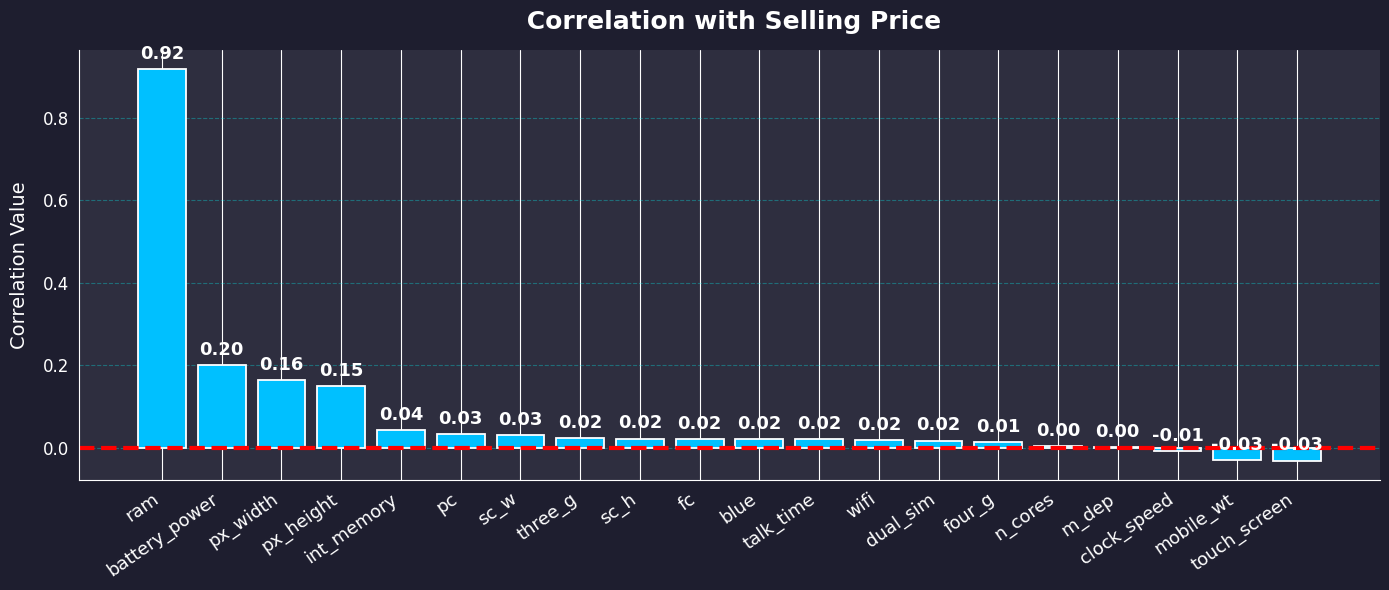

In [27]:



numeric_df = df.select_dtypes(include='number')
correlations = numeric_df.corr()["price_range"].drop("price_range")
correlations = correlations.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(14, 6))
fig.patch.set_facecolor("#1e1e2f")
ax.set_facecolor("#2e2e3f")

bars = ax.bar(
    correlations.index,
    correlations.values,
    color='#00c0ff',
    edgecolor='white',
    linewidth=1.3
)

for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        yval + 0.015,
        f"{yval:.2f}",
        ha='center',
        va='bottom',
        fontsize=13,
        color='white',
        fontweight='bold'
    )

ax.set_xticks(range(len(correlations.index)))
ax.set_xticklabels(correlations.index, rotation=35, ha='right', fontsize=13, color='white')
ax.set_yticklabels([f"{y:.1f}" for y in ax.get_yticks()], fontsize=12, color='white')

ax.set_title(" Correlation with Selling Price", fontsize=18, color='white', pad=15, weight='bold')
ax.set_ylabel("Correlation Value", fontsize=14, color='white', labelpad=10)

ax.grid(axis='y', linestyle='--', alpha=0.3, color='cyan')
plt.axhline(0,color='red', linestyle='--', linewidth=3)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

plt.tight_layout()
plt.show()



<div style="
    background: linear-gradient(145deg, #e0f7fa, #ffffff);
    border-left: 12px solidrgb(212, 0, 0);
    width: 50%;
    margin: 40px auto;
    padding: 24px 32px;
    border-radius: 20px;
    box-shadow: 0 8px 24px rgba(0, 166, 212, 0.3);
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    position: relative;
    overflow: hidden;
    text-align:center;
">
  <div style="
      position: absolute;
      top: -22px;
      right: -20px;
      background:rgb(0, 47, 77);
      color: white;
      font-size: 26px;
      padding: 10px 16px;
      border-radius: 50%;
      box-shadow: 0 0 12px rgba(0, 188, 212, 0.4);
      font-weight: bold;
  "></div>
  <p style="color:rgb(0, 74, 78); font-size: 21px; margin: 0; font-weight: bold;">
     Machine learning model
  </p>
</div>


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from IPython.core.display import display, HTML
from sklearn.metrics import confusion_matrix

In [29]:


x = df.drop("price_range", axis=1)
y = df["price_range"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)
df_scaled1 = pd.DataFrame(X_scaled, columns=x.columns)

x_train, x_test, y_train, y_test = train_test_split(df_scaled1.values, y, test_size=0.2, random_state=42)


model_3 = [
    RandomForestClassifier(n_estimators=100, random_state=42),
    SVC(C=2.0, kernel='linear', gamma='scale', probability=True, random_state=42),
    DecisionTreeClassifier(random_state=42)
]


results = []
for model in model_3:
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    acc = accuracy_score(y_test, pred)
    results.append({"Model": model.__class__.__name__, "Accuracy": acc})


bars_html = '<div class="progress-box">'
for result in results:
    model_name = result["Model"]
    acc = result["Accuracy"] * 100
    bars_html += f"""
    <div class="progress-item">
        <strong>{model_name}</strong>
        <div class="progress-container">
            <div class="progress-bar" style="width:{acc:.2f}%">{acc:.2f}%</div>
        </div>
    </div>
    """
bars_html += '</div>'

html_style = """
<style>
.progress-box {
color:black;
    width: 60%;
    margin: 20px auto;
    padding: 15px;
    border: 1px solid #ddd;
    border-radius: 10px;
    background-color: #f9f9f9;
    font-family: Arial, sans-serif;
}
.progress-item {
    margin-bottom: 15px;
}
.progress-container {
    width: 100%;
    background-color: #eee;
    border-radius: 20px;
    overflow: hidden;
    height: 25px;
    margin-top: 5px;
}
.progress-bar {
    height: 25px;
    background-color: #4CAF50;
    text-align: center;
    line-height: 25px;
    color: white;
    font-weight: bold;
}
</style>
"""

display(HTML(html_style + bars_html))


rf

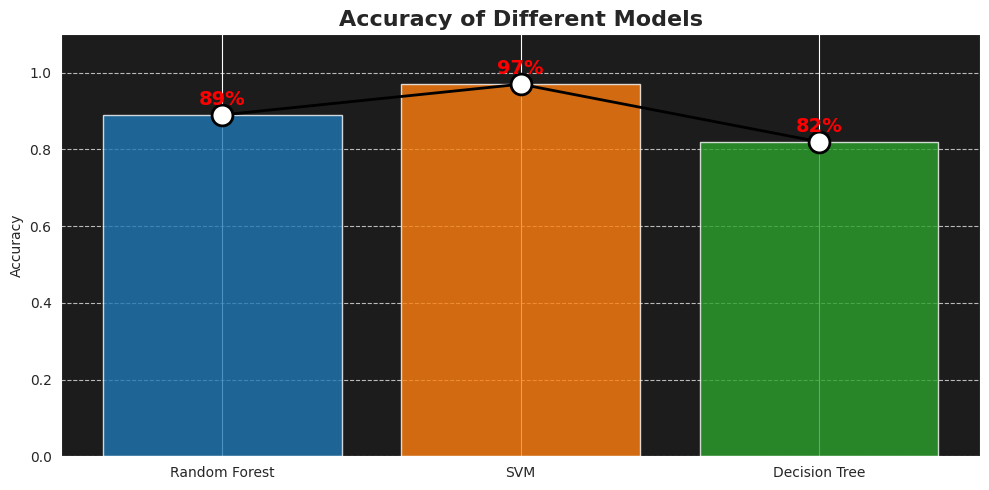

In [30]:

data = {
    'Model': ['Random Forest', 'SVM', 'Decision Tree'],
    'Accuracy': [0.89, 0.97, 0.82]
}

xx = pd.DataFrame(data)


plt.figure(figsize=(10,5))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']


bars = plt.bar(xx['Model'], xx['Accuracy'], color=colors, alpha=0.8)


plt.plot(
    xx['Model'], xx['Accuracy'], 
    marker='o', markersize=15, 
    markerfacecolor='white', markeredgewidth=2, markeredgecolor='black',
    color='black', linewidth=2
)

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2, yval + 0.015, 
        f'{yval*100:.0f}%',  
        ha='center', color="red", va='bottom',
        fontsize=14, fontweight='bold'
    )


plt.grid(axis='y', linestyle='--', alpha=0.7)

# عنوان و برچسب‌ها
plt.title('Accuracy of Different Models', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1) 

plt.tight_layout()
plt.show()


,Model,Accuracy
0,RandomForestClassifier,0.875
1,SVC,0.970
2,DecisionTreeClassifier,0.815


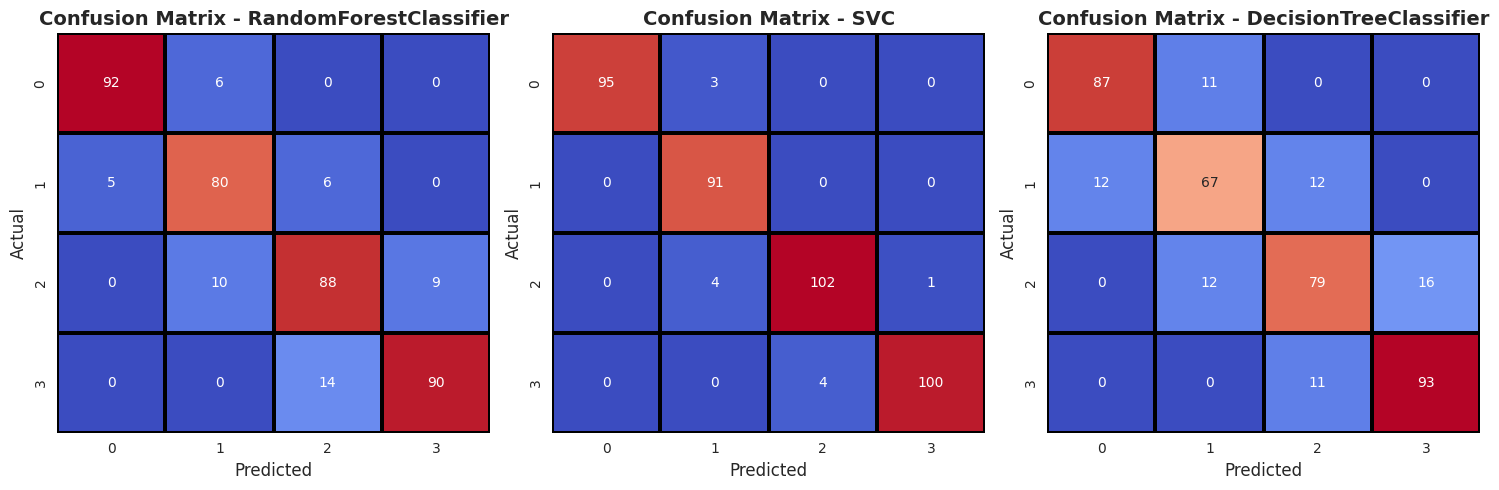

In [31]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler



x = df.drop("price_range", axis=1)
y = df["price_range"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)
df_scaled1 = pd.DataFrame(X_scaled, columns=x.columns)

x_train, x_test, y_train, y_test = train_test_split(df_scaled1.values, y, test_size=0.2, random_state=42)


model_3 = [
    RandomForestClassifier(n_estimators=100, random_state=42),
    SVC(C=2.0, kernel='linear', gamma='scale', probability=True, random_state=42),
    DecisionTreeClassifier(random_state=42)
]


results = []
predictions = []
model_names = []

for model in model_3:
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    acc = accuracy_score(y_test, pred)
    results.append({"Model": model.__class__.__name__, "Accuracy": acc})
    predictions.append(pred)
    model_names.append(model.__class__.__name__)


results_df = pd.DataFrame(results)
display(results_df)


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, ax in enumerate(axes):
    cm = confusion_matrix(y_test, predictions[i])
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
                cbar=False, linewidths=1.5, linecolor='black', ax=ax)
    ax.set_title(f'Confusion Matrix - {model_names[i]}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Predicted', fontsize=12)
    ax.set_ylabel('Actual', fontsize=12)

plt.tight_layout()
plt.show()


<div style="
  display: flex;
  justify-content: center;
  align-items: center;
">
  <div style="
    width: 180px;
    padding: 15px 20px;
    border-radius: 12px;
    font-weight: bold;
    font-size: 16px;
    color: #fff;
    background: linear-gradient(135deg, #6a11cb 0%, #2575fc 100%);
    box-shadow: 0 4px 15px rgba(0,0,0,0.3);
    text-align: center;
    transition: transform 0.3s, box-shadow 0.3s;
    cursor: pointer;
  ">
    RandomForestClassifier
  </div>
</div>

<style>
div div:hover {
  transform: translateY(-5px);
  box-shadow: 0 8px 20px rgba(0,0,0,0.5);
}
</style>


In [32]:
rf_data=df.copy()



cols_to_multiply = df.columns.drop('ram')

rf_data = rf_data.join(
    df[cols_to_multiply].multiply(df['ram'], axis=0)
      .rename(columns=lambda x: f'ram*{x}')
)



x=rf_data.drop("price_range",axis=1)
y=rf_data["price_range"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)
df_scaled1 = pd.DataFrame(X_scaled, columns=x.columns)

x_forest = df_scaled1.values
y_forest = y

x_train, x_test, y_train, y_test = train_test_split(x_forest, y_forest, test_size=0.2, random_state=42)

rf = RandomForestClassifier(
    n_estimators=100,        
    criterion='entropy',       
    max_depth=7,       
    bootstrap=True,         
    oob_score=False,         
    random_state=42,     

    warm_start=False,       

)
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
acc = accuracy_score(y_test, pred_rf)
acc



0.9875

In [33]:
from sklearn.metrics import accuracy_score

y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)


Train Accuracy: 1.0
Test Accuracy: 0.9875


In [34]:

rf_data = df.copy()

cols_to_multiply = df.columns.drop('ram')
rf_data = rf_data.join(
    df[cols_to_multiply].multiply(df['ram'], axis=0)
      .rename(columns=lambda x: f'ram*{x}')
)

x = rf_data.drop("price_range", axis=1)
y = rf_data["price_range"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)
df_scaled1 = pd.DataFrame(X_scaled, columns=x.columns)

x_forest = df_scaled1.values
y_forest = y

x_train, x_test, y_train, y_test = train_test_split(x_forest, y_forest, test_size=0.2, random_state=42)

rf = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    max_depth=7,
    bootstrap=True,
    oob_score=False,
    random_state=42,
    warm_start=False,
)
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
acc = accuracy_score(y_test, pred_rf)
print("Accuracy:", acc)




Accuracy: 0.9875


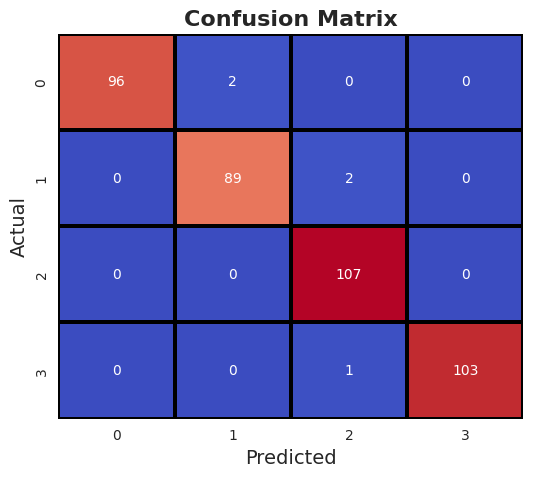

In [35]:

cm = confusion_matrix(y_test, pred_rf)


plt.figure(figsize=(6, 5))


sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', 
            cbar=False, linewidths=1.5, linecolor='black')

plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)


plt.show()


In [36]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    balanced_accuracy_score
)
from IPython.display import HTML, display


def make_progress_bar(value, color):
    percentage = value * 100
    return f"""
    <div style="background-color:#e0e0e0; border-radius:8px; height:8px; margin-top:8px; overflow:hidden;">
        <div style="width:{percentage:.1f}%; background-color:{color}; height:100%; border-radius:8px;"></div>
    </div>
    """


def make_metric_box(name, value, color):
    return f"""
    <div style="margin-bottom: 12px;">
        <div style="display:flex; justify-content:space-between; color:white;">
            <span>{name}</span>
            <span>{value:.2f}</span>
        </div>
        {make_progress_bar(value, color)}
    </div>
    """


acc = accuracy_score(y_test, pred_rf)
precision = precision_score(y_test, pred_rf, average=None, zero_division=0)
recall = recall_score(y_test, pred_rf, average=None, zero_division=0)
f1 = f1_score(y_test, pred_rf, average=None, zero_division=0)
balanced_acc = balanced_accuracy_score(y_test, pred_rf)


html_block = f"""
<div style="background-color:black; padding: 30px; border-radius: 16px; 
            box-shadow: 0 0 15px rgba(0,0,0,0.3); font-family: Segoe UI, sans-serif; 
            margin: 30px auto; max-width: 1000px;">

    <h2 style="text-align:center; color:#00e676; margin-bottom: 30px;">
        🔍 Model Evaluation: <span style='color:#aaa'>svm</span>
    </h2>

    <div style="display: flex; justify-content: center; flex-wrap: wrap; gap: 24px;">
    
       
        <div style="background-color:#2e2e2e; padding: 20px; border-radius: 12px; width: 180px;">
            <h4 style="text-align:center; color:#03a9f4;">Class 0</h4>
            {make_metric_box("Precision", precision[0], "#0288d1")}
            {make_metric_box("Recall", recall[0], "#f57c00")}
            {make_metric_box("F1 Score", f1[0], "#388e3c")}
        </div>

       
        <div style="background-color:#2e2e2e; padding: 20px; border-radius: 12px; width: 180px;">
            <h4 style="text-align:center; color:#03a9f4;">Class 1</h4>
            {make_metric_box("Precision", precision[1], "#0288d1")}
            {make_metric_box("Recall", recall[1], "#f57c00")}
            {make_metric_box("F1 Score", f1[1], "#388e3c")}
        </div>
        
        <div style="background-color:#2e2e2e; padding: 20px; border-radius: 12px; width: 180px;">
            <h4 style="text-align:center; color:#03a9f4;">Class 0</h4>
            {make_metric_box("Precision", precision[2], "#0288d1")}
            {make_metric_box("Recall", recall[2], "#f57c00")}
            {make_metric_box("F1 Score", f1[2], "#388e3c")}
        </div>

        <div style="background-color:#2e2e2e; padding: 20px; border-radius: 12px; width: 180px;">
            <h4 style="text-align:center; color:#03a9f4;">Class 1</h4>
            {make_metric_box("Precision", precision[3], "#0288d1")}
            {make_metric_box("Recall", recall[3], "#f57c00")}
            {make_metric_box("F1 Score", f1[3], "#388e3c")}
        </div>

        
        <div style="background-color:#2e2e2e; padding: 20px; border-radius: 12px; width: 180px;">
            <h4 style="text-align:center; color:#e0e0e0;">Overall</h4>
            {make_metric_box("Accuracy", acc, "#009688")}
            {make_metric_box("Balanced Acc", balanced_acc, "#ab47bc")}
        </div>
    </div>
</div>
"""

display(HTML(html_block))


<div style="
  display: flex;
  justify-content: center;
  align-items: center;
">
  <div style="
    width: 180px;
    padding: 15px 20px;
    border-radius: 12px;
    font-weight: bold;
    font-size: 16px;
    color: #fff;
    background: linear-gradient(135deg, #6a11cb 0%, #2575fc 100%);
    box-shadow: 0 4px 15px rgba(0,0,0,0.3);
    text-align: center;
    transition: transform 0.3s, box-shadow 0.3s;
    cursor: pointer;
  ">
    DecisionTreeClassifier
  </div>
</div>

<style>
div div:hover {
  transform: translateY(-5px);
  box-shadow: 0 8px 20px rgba(0,0,0,0.5);
}
</style>


In [37]:
dtc_data=df.copy()


cols_to_multiply = df.columns.drop('ram')


dtc_data = dtc_data.join(
    df[cols_to_multiply].multiply(df['ram'], axis=0)
      .rename(columns=lambda x: f'ram*{x}')
)

In [38]:
x=dtc_data.drop("price_range",axis=1)
y=dtc_data["price_range"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)
df_scaled1 = pd.DataFrame(X_scaled, columns=x.columns)

x_forest = df_scaled1.values
y_forest = y

x_train, x_test, y_train, y_test = train_test_split(x_forest, y_forest, test_size=0.2, random_state=42)

In [39]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    criterion="entropy",            
    splitter="best",               
    max_depth=10,               
    min_weight_fraction_leaf=0.0,  
    random_state=42,             
)


model.fit(x_train, y_train)


pred_dtc = model.predict(x_test)

acc = accuracy_score(y_test, pred_dtc)
acc

0.9975

In [40]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(
    criterion="entropy",
    splitter="best",
    max_depth=10,
    min_weight_fraction_leaf=0.0,
    random_state=42,
)


model.fit(x_train, y_train)


pred_dtc = model.predict(x_test)


acc = accuracy_score(y_test, pred_dtc)
print("Decision Tree Accuracy:", acc)




Decision Tree Accuracy: 0.9975


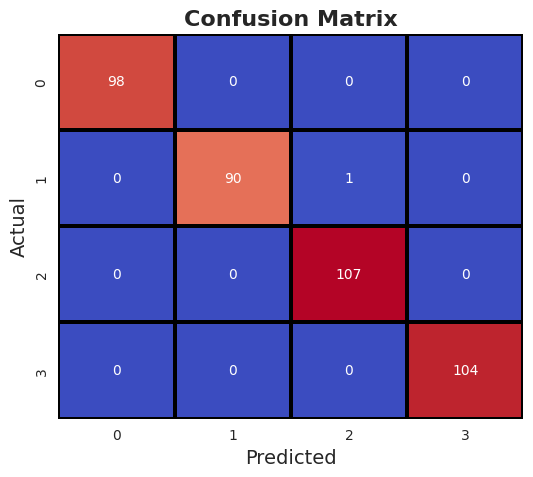

In [41]:

cm = confusion_matrix(y_test, pred_dtc)


plt.figure(figsize=(6, 5))


sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', 
            cbar=False, linewidths=1.5, linecolor='black')


plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)


plt.show()


In [42]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    balanced_accuracy_score
)
from IPython.display import HTML, display


def make_progress_bar(value, color):
    percentage = value * 100
    return f"""
    <div style="background-color:#e0e0e0; border-radius:8px; height:8px; margin-top:8px; overflow:hidden;">
        <div style="width:{percentage:.1f}%; background-color:{color}; height:100%; border-radius:8px;"></div>
    </div>
    """


def make_metric_box(name, value, color):
    return f"""
    <div style="margin-bottom: 12px;">
        <div style="display:flex; justify-content:space-between; color:white;">
            <span>{name}</span>
            <span>{value:.2f}</span>
        </div>
        {make_progress_bar(value, color)}
    </div>
    """


acc = accuracy_score(y_test, pred_dtc)
precision = precision_score(y_test, pred_dtc, average=None, zero_division=0)
recall = recall_score(y_test, pred_dtc, average=None, zero_division=0)
f1 = f1_score(y_test, pred_dtc, average=None, zero_division=0)
balanced_acc = balanced_accuracy_score(y_test, pred_dtc)

html_block = f"""
<div style="background-color:black; padding: 30px; border-radius: 16px; 
            box-shadow: 0 0 15px rgba(0,0,0,0.3); font-family: Segoe UI, sans-serif; 
            margin: 30px auto; max-width: 1000px;">

    <h2 style="text-align:center; color:#00e676; margin-bottom: 30px;">
        🔍 Model Evaluation: <span style='color:#aaa'>svm</span>
    </h2>

    <div style="display: flex; justify-content: center; flex-wrap: wrap; gap: 24px;">
    
      
        <div style="background-color:#2e2e2e; padding: 20px; border-radius: 12px; width: 180px;">
            <h4 style="text-align:center; color:#03a9f4;">Class 0</h4>
            {make_metric_box("Precision", precision[0], "#0288d1")}
            {make_metric_box("Recall", recall[0], "#f57c00")}
            {make_metric_box("F1 Score", f1[0], "#388e3c")}
        </div>

       
        <div style="background-color:#2e2e2e; padding: 20px; border-radius: 12px; width: 180px;">
            <h4 style="text-align:center; color:#03a9f4;">Class 1</h4>
            {make_metric_box("Precision", precision[1], "#0288d1")}
            {make_metric_box("Recall", recall[1], "#f57c00")}
            {make_metric_box("F1 Score", f1[1], "#388e3c")}
        </div>
       
        <div style="background-color:#2e2e2e; padding: 20px; border-radius: 12px; width: 180px;">
            <h4 style="text-align:center; color:#03a9f4;">Class 0</h4>
            {make_metric_box("Precision", precision[2], "#0288d1")}
            {make_metric_box("Recall", recall[2], "#f57c00")}
            {make_metric_box("F1 Score", f1[2], "#388e3c")}
        </div>

       
        <div style="background-color:#2e2e2e; padding: 20px; border-radius: 12px; width: 180px;">
            <h4 style="text-align:center; color:#03a9f4;">Class 1</h4>
            {make_metric_box("Precision", precision[3], "#0288d1")}
            {make_metric_box("Recall", recall[3], "#f57c00")}
            {make_metric_box("F1 Score", f1[3], "#388e3c")}
        </div>

       
        <div style="background-color:#2e2e2e; padding: 20px; border-radius: 12px; width: 180px;">
            <h4 style="text-align:center; color:#e0e0e0;">Overall</h4>
            {make_metric_box("Accuracy", acc, "#009688")}
            {make_metric_box("Balanced Acc", balanced_acc, "#ab47bc")}
        </div>
    </div>
</div>
"""

display(HTML(html_block))


<div style="
  display: flex;
  justify-content: center;
  align-items: center;
">
  <div style="
    width: 180px;
    padding: 15px 20px;
    border-radius: 12px;
    font-weight: bold;
    font-size: 16px;
    color: #fff;
    background: linear-gradient(135deg, #6a11cb 0%, #2575fc 100%);
    box-shadow: 0 4px 15px rgba(0,0,0,0.3);
    text-align: center;
    transition: transform 0.3s, box-shadow 0.3s;
    cursor: pointer;
  ">
    SVM
  </div>
</div>

<style>
div div:hover {
  transform: translateY(-5px);
  box-shadow: 0 8px 20px rgba(0,0,0,0.5);
}
</style>


In [43]:
df_svm1=df.copy()

cols_to_multiply = df.columns.drop('ram')


df_svm1 = df_svm1.join(
    df[cols_to_multiply].multiply(df['ram'], axis=0)
      .rename(columns=lambda x: f'ram*{x}')
)


In [44]:
x=df_svm1.drop("price_range",axis=1)
y=df_svm1["price_range"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)
df_scaled1 = pd.DataFrame(X_scaled, columns=x.columns)

x_forest = df_scaled1.values
y_forest = y

x_train, x_test, y_train, y_test = train_test_split(x_forest, y_forest, test_size=0.2, random_state=42)

In [45]:
from sklearn.svm import SVC as svm

rfc = svm(
    C=3.0,                    
    kernel='rbf',           
    shrinking=True,            
    probability=True,                  
    max_iter=-1,                 
    break_ties=True,           
    random_state=42            
)
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)

acc = accuracy_score(y_test, pred_rfc)
acc



0.9825

In [46]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    balanced_accuracy_score
)
from IPython.display import HTML, display


def make_progress_bar(value, color):
    percentage = value * 100
    return f"""
    <div style="background-color:#e0e0e0; border-radius:8px; height:8px; margin-top:8px; overflow:hidden;">
        <div style="width:{percentage:.1f}%; background-color:{color}; height:100%; border-radius:8px;"></div>
    </div>
    """

def make_metric_box(name, value, color):
    return f"""
    <div style="margin-bottom: 12px;">
        <div style="display:flex; justify-content:space-between; color:white;">
            <span>{name}</span>
            <span>{value:.2f}</span>
        </div>
        {make_progress_bar(value, color)}
    </div>
    """


acc = accuracy_score(y_test, pred_rfc)
precision = precision_score(y_test, pred_rfc, average=None, zero_division=0)
recall = recall_score(y_test, pred_rfc, average=None, zero_division=0)
f1 = f1_score(y_test, pred_rfc, average=None, zero_division=0)
balanced_acc = balanced_accuracy_score(y_test, pred_rfc)


html_block = f"""
<div style="background-color:black; padding: 30px; border-radius: 16px; 
            box-shadow: 0 0 15px rgba(0,0,0,0.3); font-family: Segoe UI, sans-serif; 
            margin: 30px auto; max-width: 1000px;">

    <h2 style="text-align:center; color:#00e676; margin-bottom: 30px;">
        🔍 Model Evaluation: <span style='color:#aaa'>svm</span>
    </h2>

    <div style="display: flex; justify-content: center; flex-wrap: wrap; gap: 24px;">
    
        <div style="background-color:#2e2e2e; padding: 20px; border-radius: 12px; width: 180px;">
            <h4 style="text-align:center; color:#03a9f4;">Class 0</h4>
            {make_metric_box("Precision", precision[0], "#0288d1")}
            {make_metric_box("Recall", recall[0], "#f57c00")}
            {make_metric_box("F1 Score", f1[0], "#388e3c")}
        </div>

       \
        <div style="background-color:#2e2e2e; padding: 20px; border-radius: 12px; width: 180px;">
            <h4 style="text-align:center; color:#03a9f4;">Class 1</h4>
            {make_metric_box("Precision", precision[1], "#0288d1")}
            {make_metric_box("Recall", recall[1], "#f57c00")}
            {make_metric_box("F1 Score", f1[1], "#388e3c")}
        </div>
        
        <div style="background-color:#2e2e2e; padding: 20px; border-radius: 12px; width: 180px;">
            <h4 style="text-align:center; color:#03a9f4;">Class 0</h4>
            {make_metric_box("Precision", precision[2], "#0288d1")}
            {make_metric_box("Recall", recall[2], "#f57c00")}
            {make_metric_box("F1 Score", f1[2], "#388e3c")}
        </div>

        <div style="background-color:#2e2e2e; padding: 20px; border-radius: 12px; width: 180px;">
            <h4 style="text-align:center; color:#03a9f4;">Class 1</h4>
            {make_metric_box("Precision", precision[3], "#0288d1")}
            {make_metric_box("Recall", recall[3], "#f57c00")}
            {make_metric_box("F1 Score", f1[3], "#388e3c")}
        </div>

        
        <div style="background-color:#2e2e2e; padding: 20px; border-radius: 12px; width: 180px;">
            <h4 style="text-align:center; color:#e0e0e0;">Overall</h4>
            {make_metric_box("Accuracy", acc, "#009688")}
            {make_metric_box("Balanced Acc", balanced_acc, "#ab47bc")}
        </div>
    </div>
</div>
"""

display(HTML(html_block))


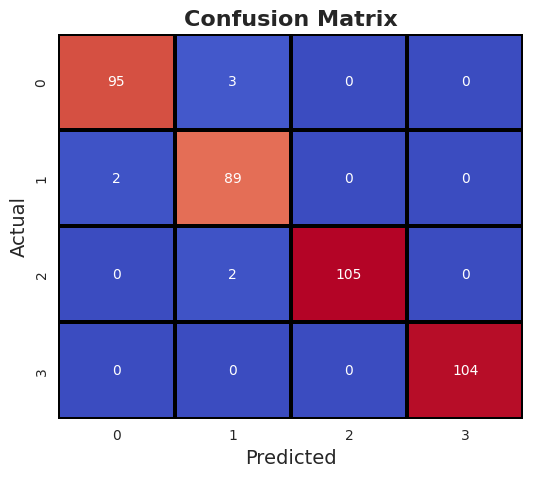

In [47]:

cm = confusion_matrix(y_test, pred_rfc)


plt.figure(figsize=(6, 5))


sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', 
            cbar=False, linewidths=1.5, linecolor='black')

plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)


plt.show()


In [48]:
x = df_scaled1
y = y

mod =svm(
    C=3.0,                      
    kernel='linear',            
    shrinking=True,            
    probability=True,          
    cache_size=300,           
    max_iter=-1,                
    decision_function_shape='ovr',
    break_ties=True,            
    random_state=42              
)
sc = KFold(5)

res = cross_val_score(mod, x, y.ravel(), cv=sc)

html_code4 = f"""
<style>
  table {{
    color:black;
    border-collapse: collapse;
    width: 400px;
    margin: 10px auto;
    font-family: Tahoma, sans-serif;
    direction: rtl;
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
    border-radius: 8px;
    overflow: hidden;
    background: #fff;
  }}
  th, td {{
    border: 1px solid #ddd;
    padding: 12px 20px;
    text-align: center;
  }}
  th {{
    background-color: #007acc;
    color: white;
    font-size: 1.1em;
  }}
  tr:nth-child(even) {{
    background-color: #f0f8ff;
  }}
  tr:hover {{
    background-color: #d0e7ff;
  }}
  h3 {{
    text-align: center;
    font-family: Tahoma, sans-serif;
    color: #333;
  }}
  .negative {{
    color: red;
    font-weight: bold;
  }}
</style>

<h3>result Cross-validation</h3>
<table>
  <thead>
    <tr>
      <th>Fold Number</th>
      <th>model score</th>
    </tr>
  </thead>
  <tbody>
"""

for i, score in enumerate(res, 1):
    color_class = "negative" if score < 0 else ""
    html_code4 += f'<tr><td>{i}</td><td class="{color_class}">{score:.4f}</td></tr>'

mean_score = np.mean(res)
mean_color_class = "negative" if mean_score < 0 else ""
html_code4 += f"""
  </tbody>
  <tfoot>
    <tr>
      <th> </th>
      <th class="{mean_color_class}">{mean_score:.4f}</th>
    </tr>
  </tfoot>
</table>
"""

display(HTML(html_code4))


/tmp/ipykernel_13/4184186822.py:17: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  res = cross_val_score(mod, x, y.ravel(), cv=sc)


Fold Number,model score
1,0.9975
2,0.9950
3,1.0000
4,1.0000
5,0.9975
,0.9980


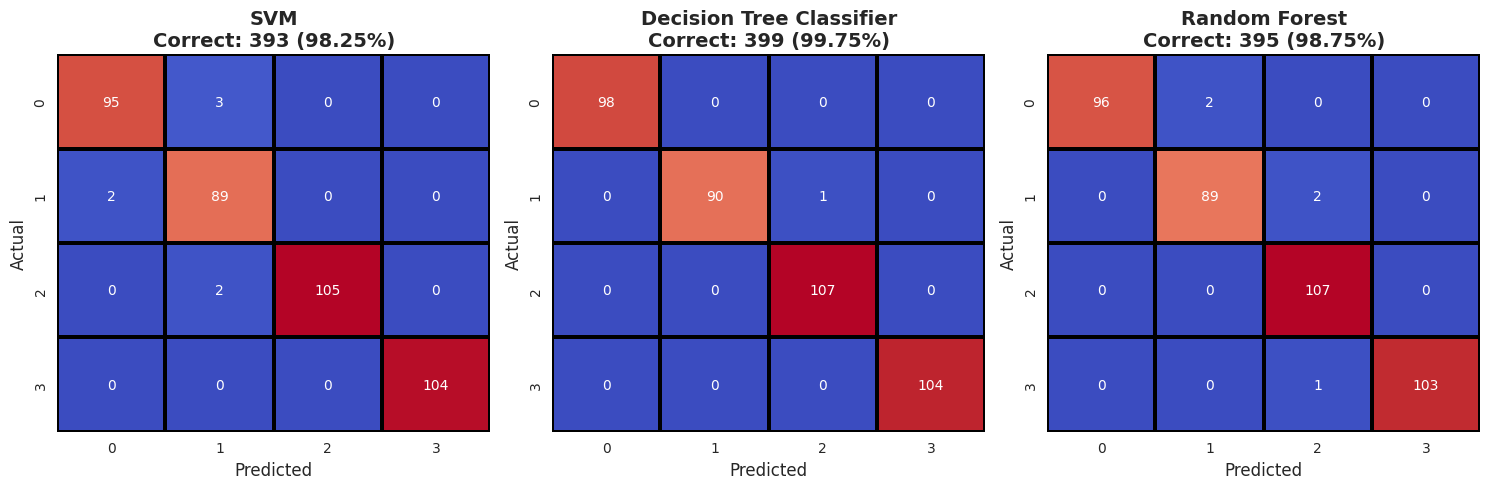

In [49]:

from sklearn.metrics import confusion_matrix



predictions = [pred_rfc, pred_dtc, pred_rf]
model_names = ['SVM', 'Decision Tree Classifier', 'Random Forest']


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, ax in enumerate(axes):
    cm = confusion_matrix(y_test, predictions[i])
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
                cbar=False, linewidths=1.5, linecolor='black', ax=ax)

    correct = np.trace(cm) 
    total = np.sum(cm)     
    accuracy = correct / total * 100
    
    ax.set_title(f'{model_names[i]}\nCorrect: {correct} ({accuracy:.2f}%)', fontsize=14, fontweight='bold')
    ax.set_xlabel('Predicted', fontsize=12)
    ax.set_ylabel('Actual', fontsize=12)

plt.tight_layout()
plt.show()


<div style="
    border: 2px solid #4CAF50;
    background-color: #f9fff9;
    color: #2e7d32;
    padding: 15px 20px;
    border-radius: 12px;
    box-shadow: 2px 2px 12px rgba(0,0,0,0.1);
    font-weight: bold;
    font-size: 1.1em;
    max-width: 400px;
">
  ✅ Now the highest number of correct answers was for the Decision Tree with <span style="color:#d32f2f;">399</span>.
</div>
